In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from keras.layers import Embedding
import proplot as pplt
from kmodes.kprototypes import KPrototypes
import plotly.express as px

import warnings
warnings.filterwarnings('ignore') 

In [ ]:
!pip install proplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.0 MB 8.8 MB/s 


In [ ]:
pip uninstall kmodes && pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv(r'/content/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Dealing with missing values 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

Income               24
ID                    0
NumDealsPurchases     0
Z_Revenue             0
Z_CostContact         0
dtype: int64

In [ ]:
##imputng null values with mean 
df.loc[(df['Income'].isnull()==True), 'Income']=df['Income'].mean()

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df['Kids']=df['Kidhome']+df['Teenhome']
df['Expense']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntFishProducts']+df['MntGoldProds']

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
##renaming ctgries

df['Marital_Status']=df['Marital_Status'].str.replace('Married','In relationship')
df['Marital_Status']=df['Marital_Status'].str.replace('Together','In relationship')
df['Marital_Status']=df['Marital_Status'].str.replace('Divorced','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('Widow','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('Absurd','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('Alone','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('YOLO','Single')





In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
df['Education']=df['Education'].str.replace('2n Cycle','Master')

In [ ]:
df['Dt_Customer']=pd.to_datetime(df.Dt_Customer)
df['Date_Collected']='01-01-2015'
df['Date_Collected']=pd.to_datetime(df.Date_Collected)
df['Time_Enrol_days']=(df['Date_Collected']-df['Dt_Customer']).dt.days

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Kids', 'Expense', 'Date_Collected', 'Time_Enrol_days'],
      dtype='object')

In [ ]:
#dropping unwanted cols
df=df.drop(columns=['ID','Dt_Customer','Kidhome','Teenhome','Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response','Date_Collected'])

In [ ]:
#rename cols
df.columns = ['Year_Birth','Education','Marital_Status','Income','Wines','Fruits','Meat','Fish','Sweet','Gold','Children','Expense','Time_Enrol_days']

In [ ]:
df.describe()

,Year_Birth,Income,Wines,Fruits,Meat,Fish,Sweet,Gold,Children,Expense,Time_Enrol_days
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,0.950446,605.798214,538.043304
std,11.984069,25037.797168,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,0.751803,602.249288,232.229893
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,26.000000
25%,1959.000000,35538.750000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,0.000000,68.750000,366.750000
50%,1970.000000,51741.500000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,1.000000,396.000000,539.000000
75%,1977.000000,68289.750000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1.000000,1045.500000,711.250000
max,1996.000000,666666.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,3.000000,2525.000000,1089.000000


In [ ]:
#Dealing with outliers

from scipy import stats


In [ ]:
#removing observation with SD more than 3 
df1 = df[(np.abs(stats.zscore(df['Income'])) < 3)]
df1.reset_index(inplace=True)
df1=df1.drop(columns=['index'])

In [ ]:
df_final = df1.copy()

for i in df_final.select_dtypes(exclude='object').columns:
  df_final.loc[:, i]= StandardScaler().fit_transform(np.array(df_final[[i]]))

In [ ]:
#choosing Optiml K 
K = range(1,15)
cost = []
for k in K:
  kproto = KPrototypes(n_clusters=k, init = 'Cao', random_state=42)
  kproto.fit_predict(df_final, categorical=[1,2])
  cost.append(kproto.cost_)

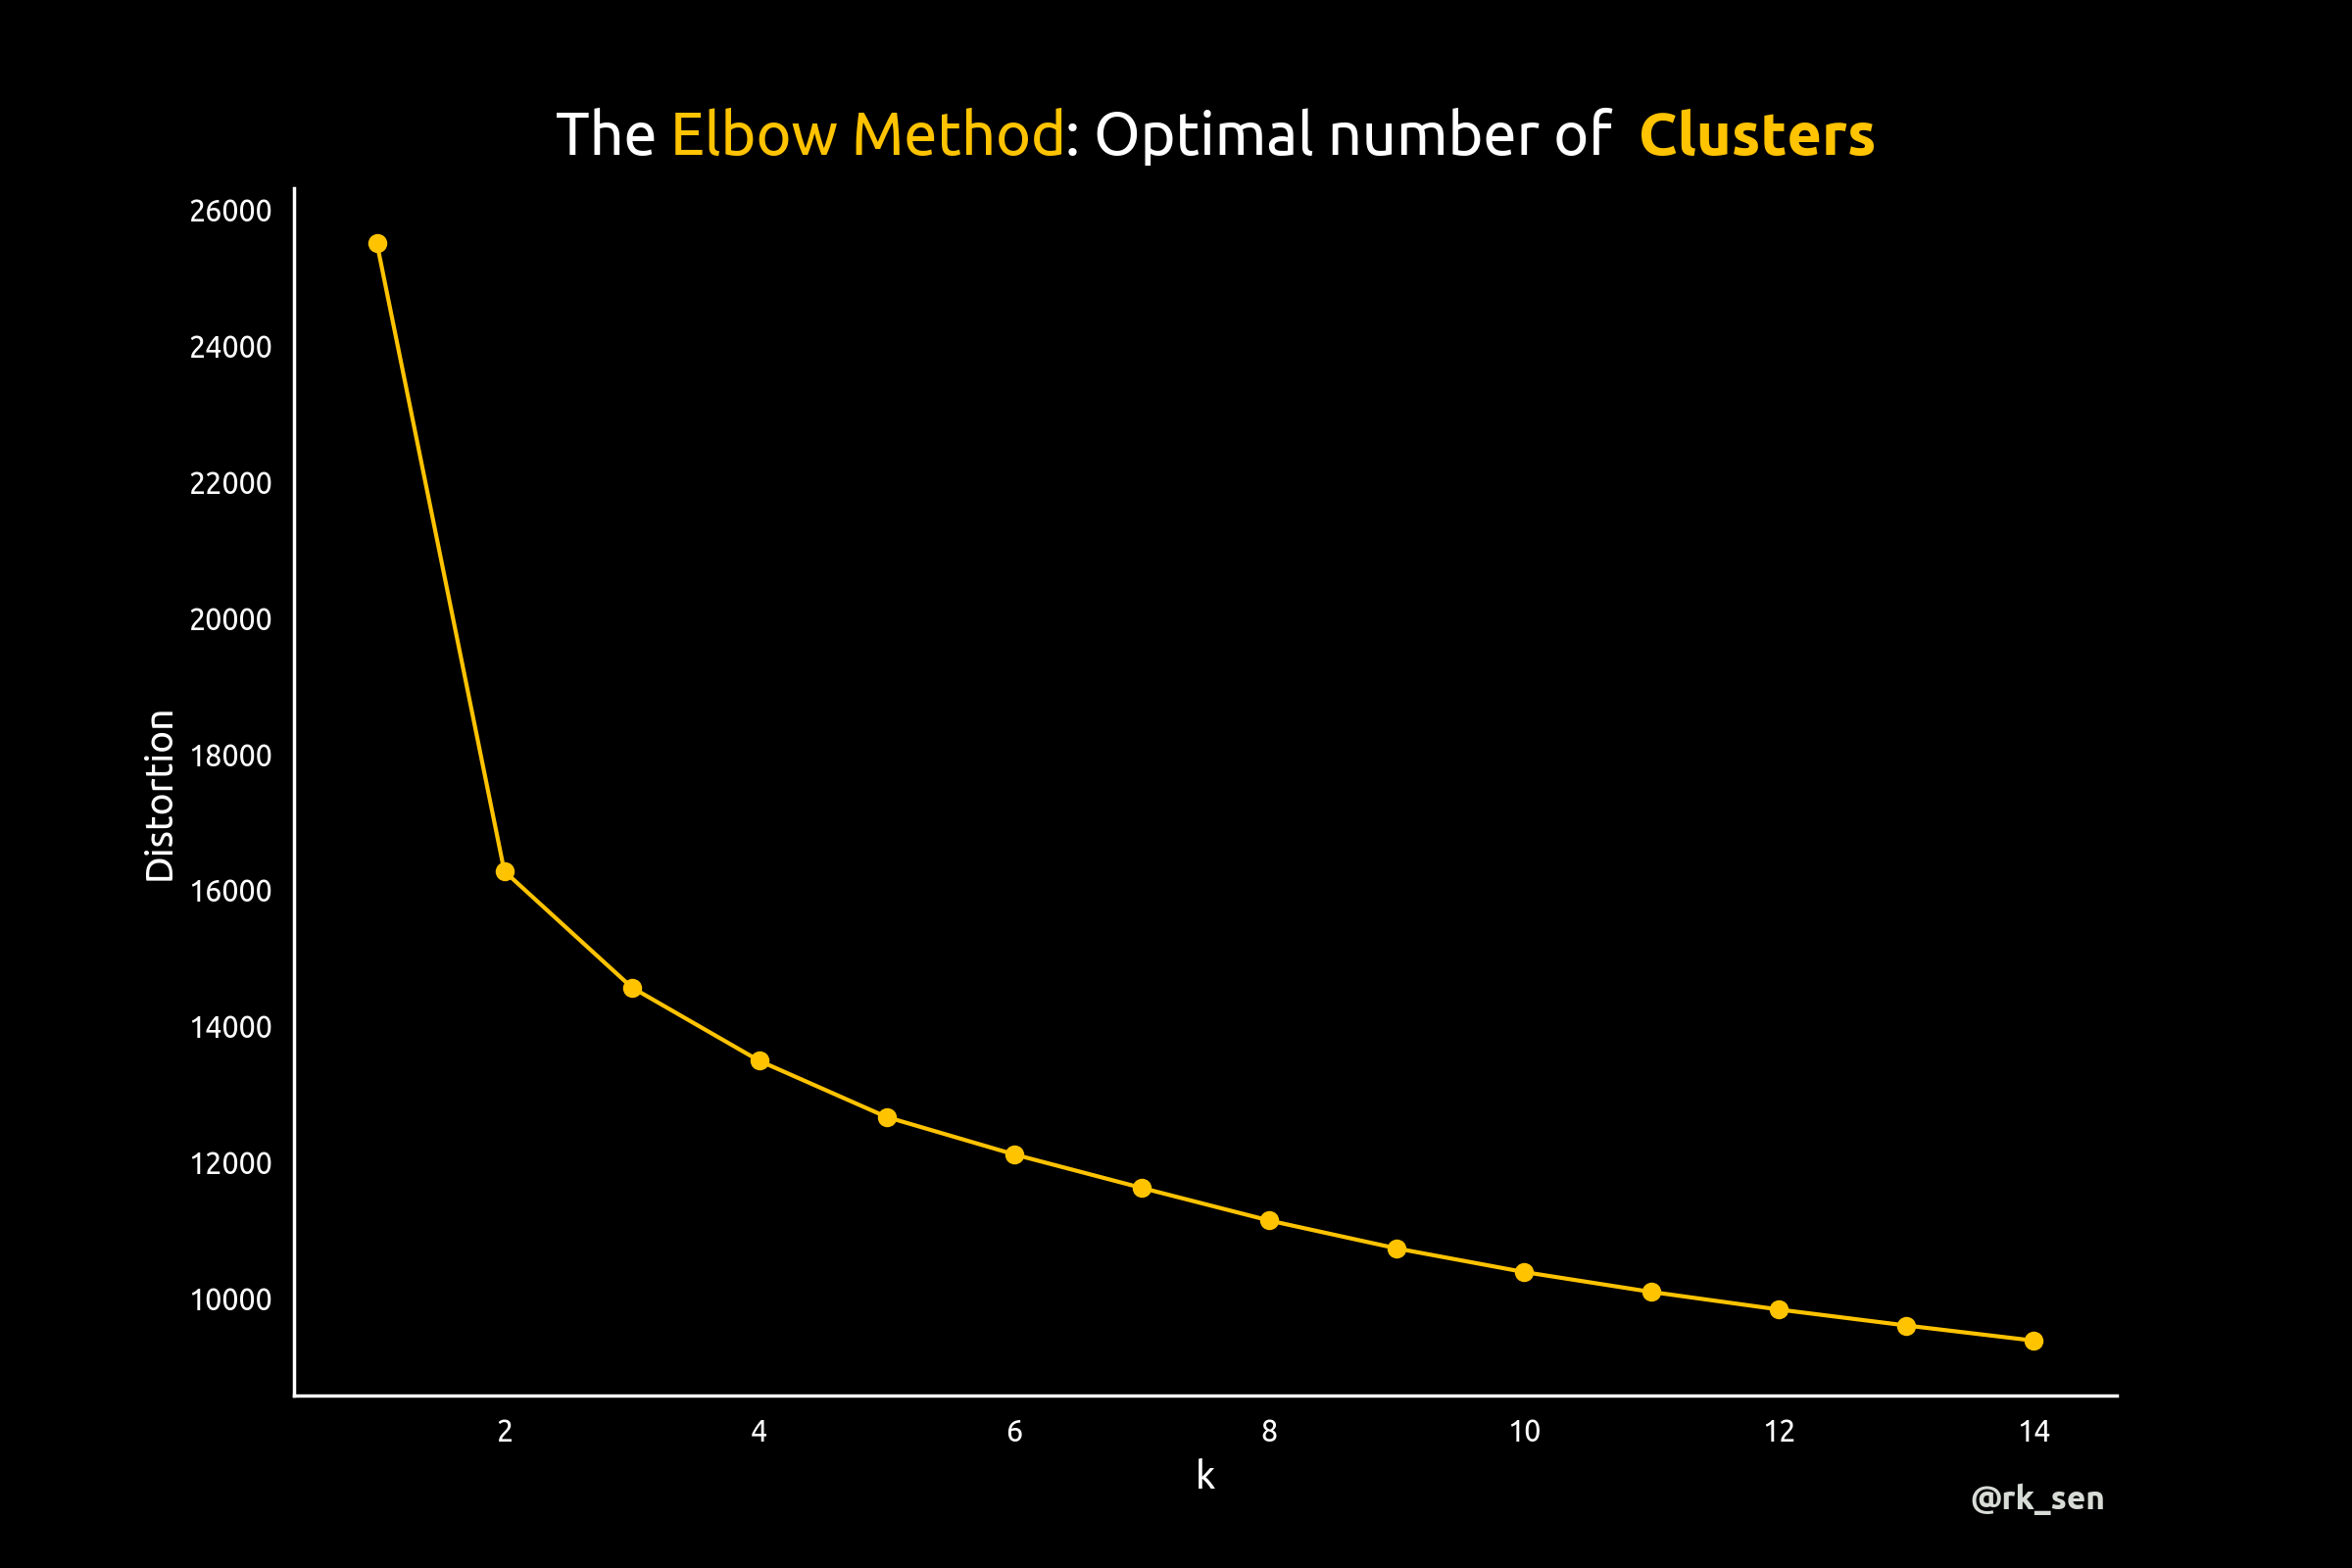

In [ ]:
sns.set(rc = {'axes.facecolor':'black','figure.facecolor':'black','axes.grid':False,'font.family':'Ubuntu'})

fig,ax=plt.subplots(figsize=(12,8))
plt.plot(K,cost,'bo-',color="#FFC300")
plt.xlabel('k',color='white',size=14)
plt.ylabel('Distortion', color='white',size=14)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.text(2.4, 26800,"The",size=22,color="white")
plt.text(3.3, 26800,"Elbow Method",size=22,color="#FFC300")
plt.text(6.4, 26800,": Optimal number of",size=22,color="white")
plt.text(67000,2750, "Expenses",size=22,color="#FFC300")
plt.text(120000,-350, "@rk_sen",fontsize=12,ha='right',color="light gray",fontweight='bold')
plt.text(10.9, 26800,"Clusters",size=22,color="#FFC300",fontweight='bold')
plt.text(14.56, 6900,"@rk_sen",fontsize=12,ha='right',color="light gray",fontweight='bold')

plt.show()








In [ ]:
##elbow method is used to determine the optimal no. of clusters to use. In this case, choose 4 clusters


In [ ]:
#clustering
kproto = KPrototypes(n_clusters=4,init='Cao',n_jobs=4)
clusters = kproto.fit_predict(df_final, categorical=[1,2])

In [ ]:
#merging og data with clusters
df_clusters = pd.concat([df1, pd.DataFrame({'cluster': clusters})],axis=1)

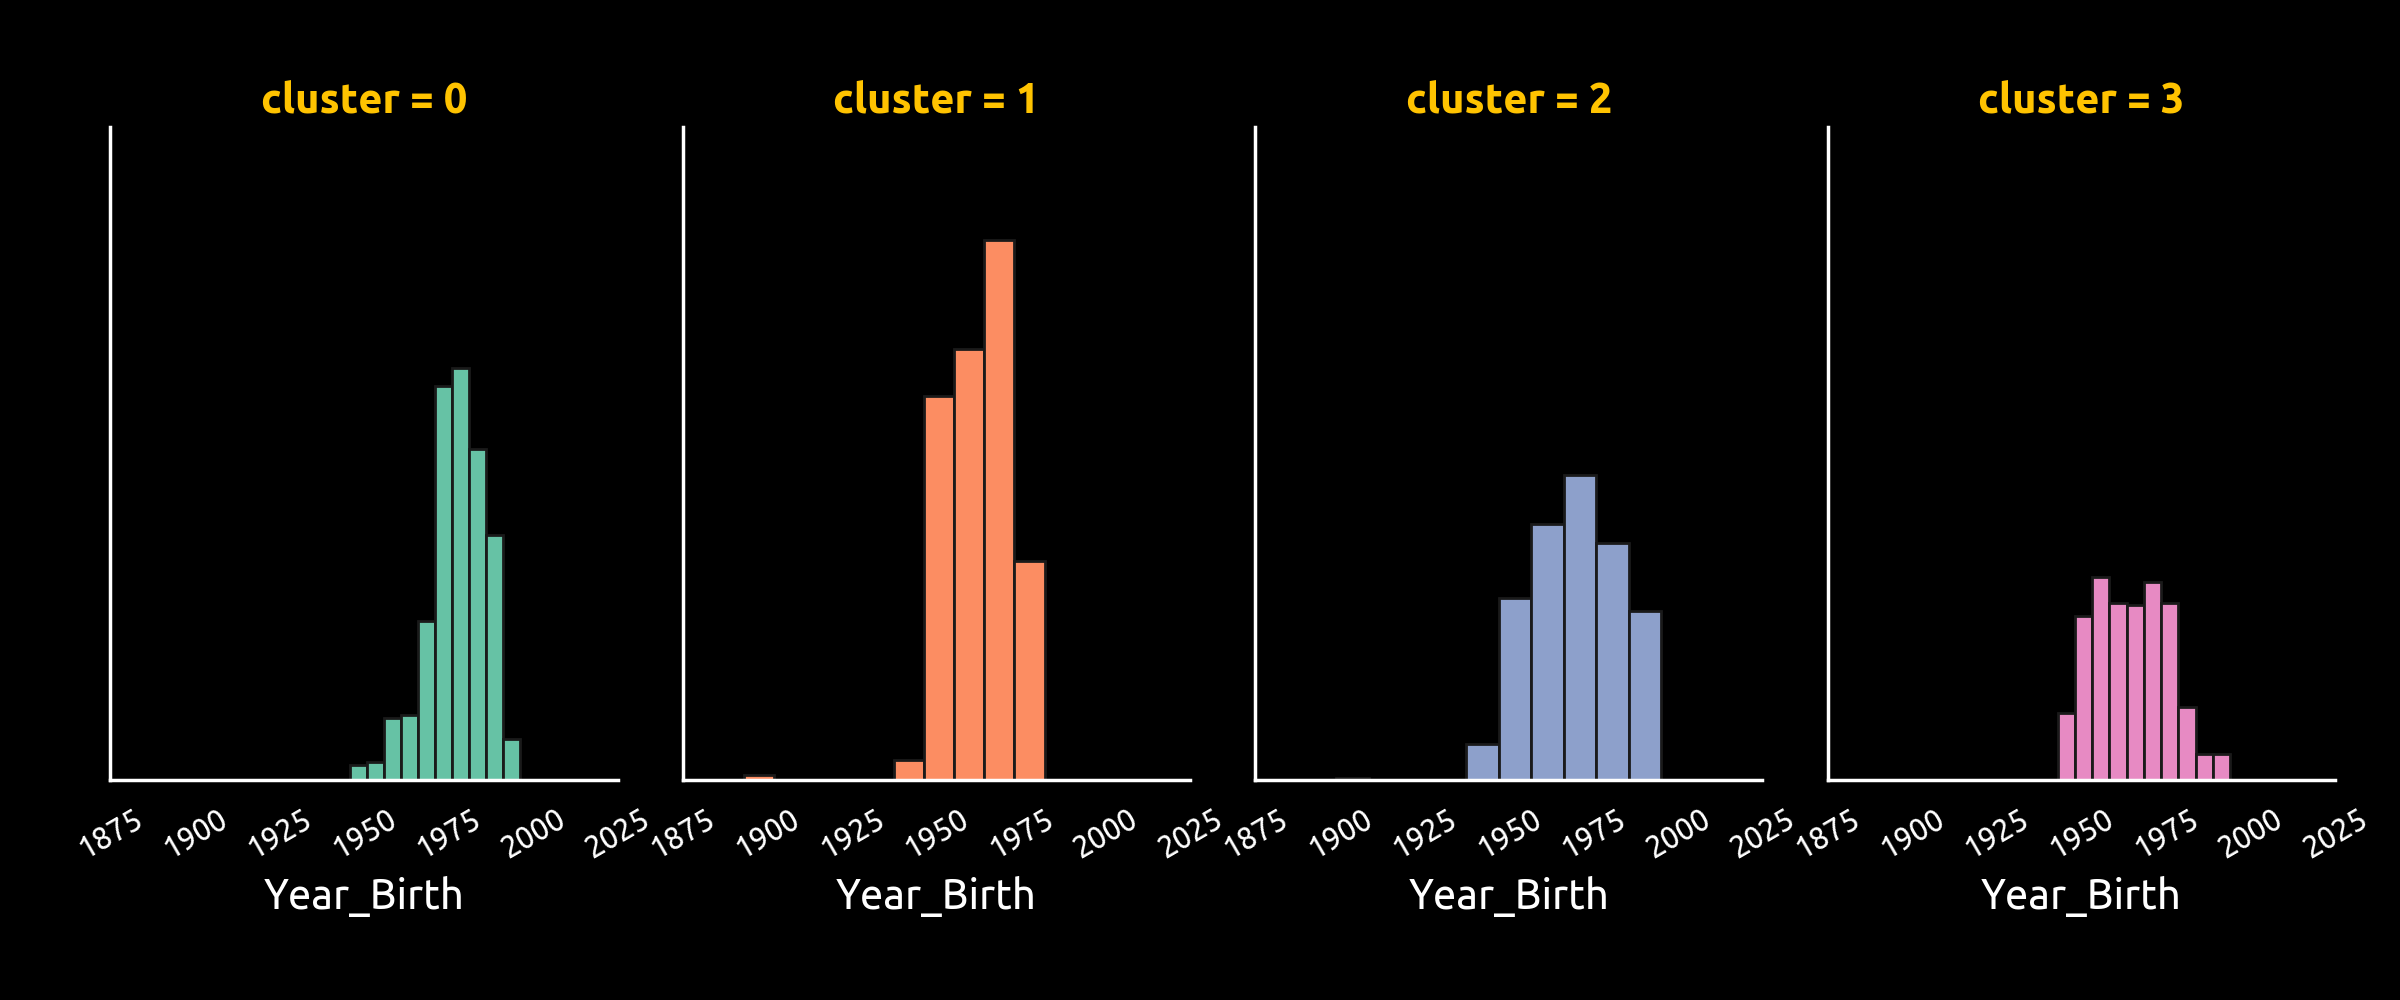

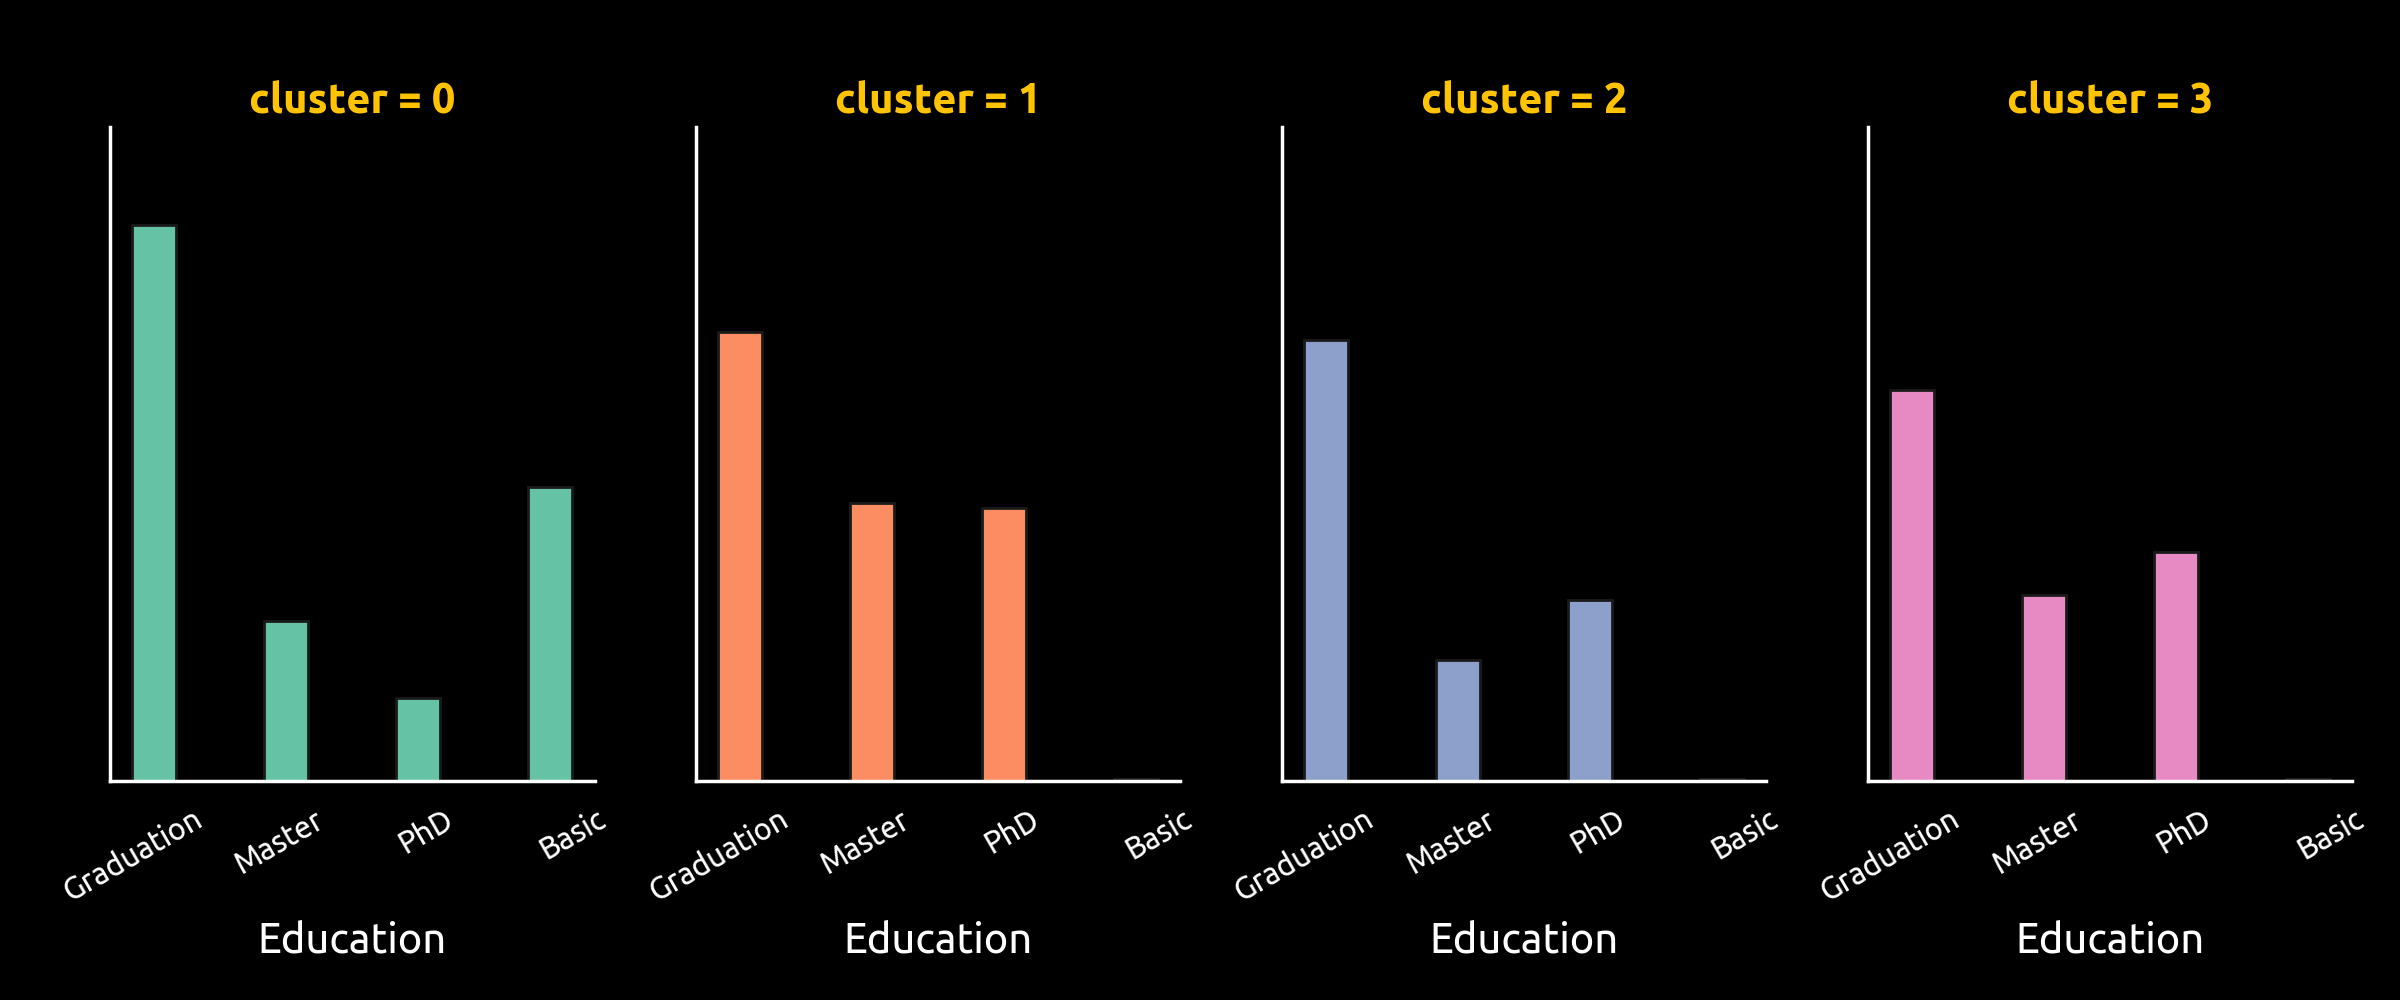

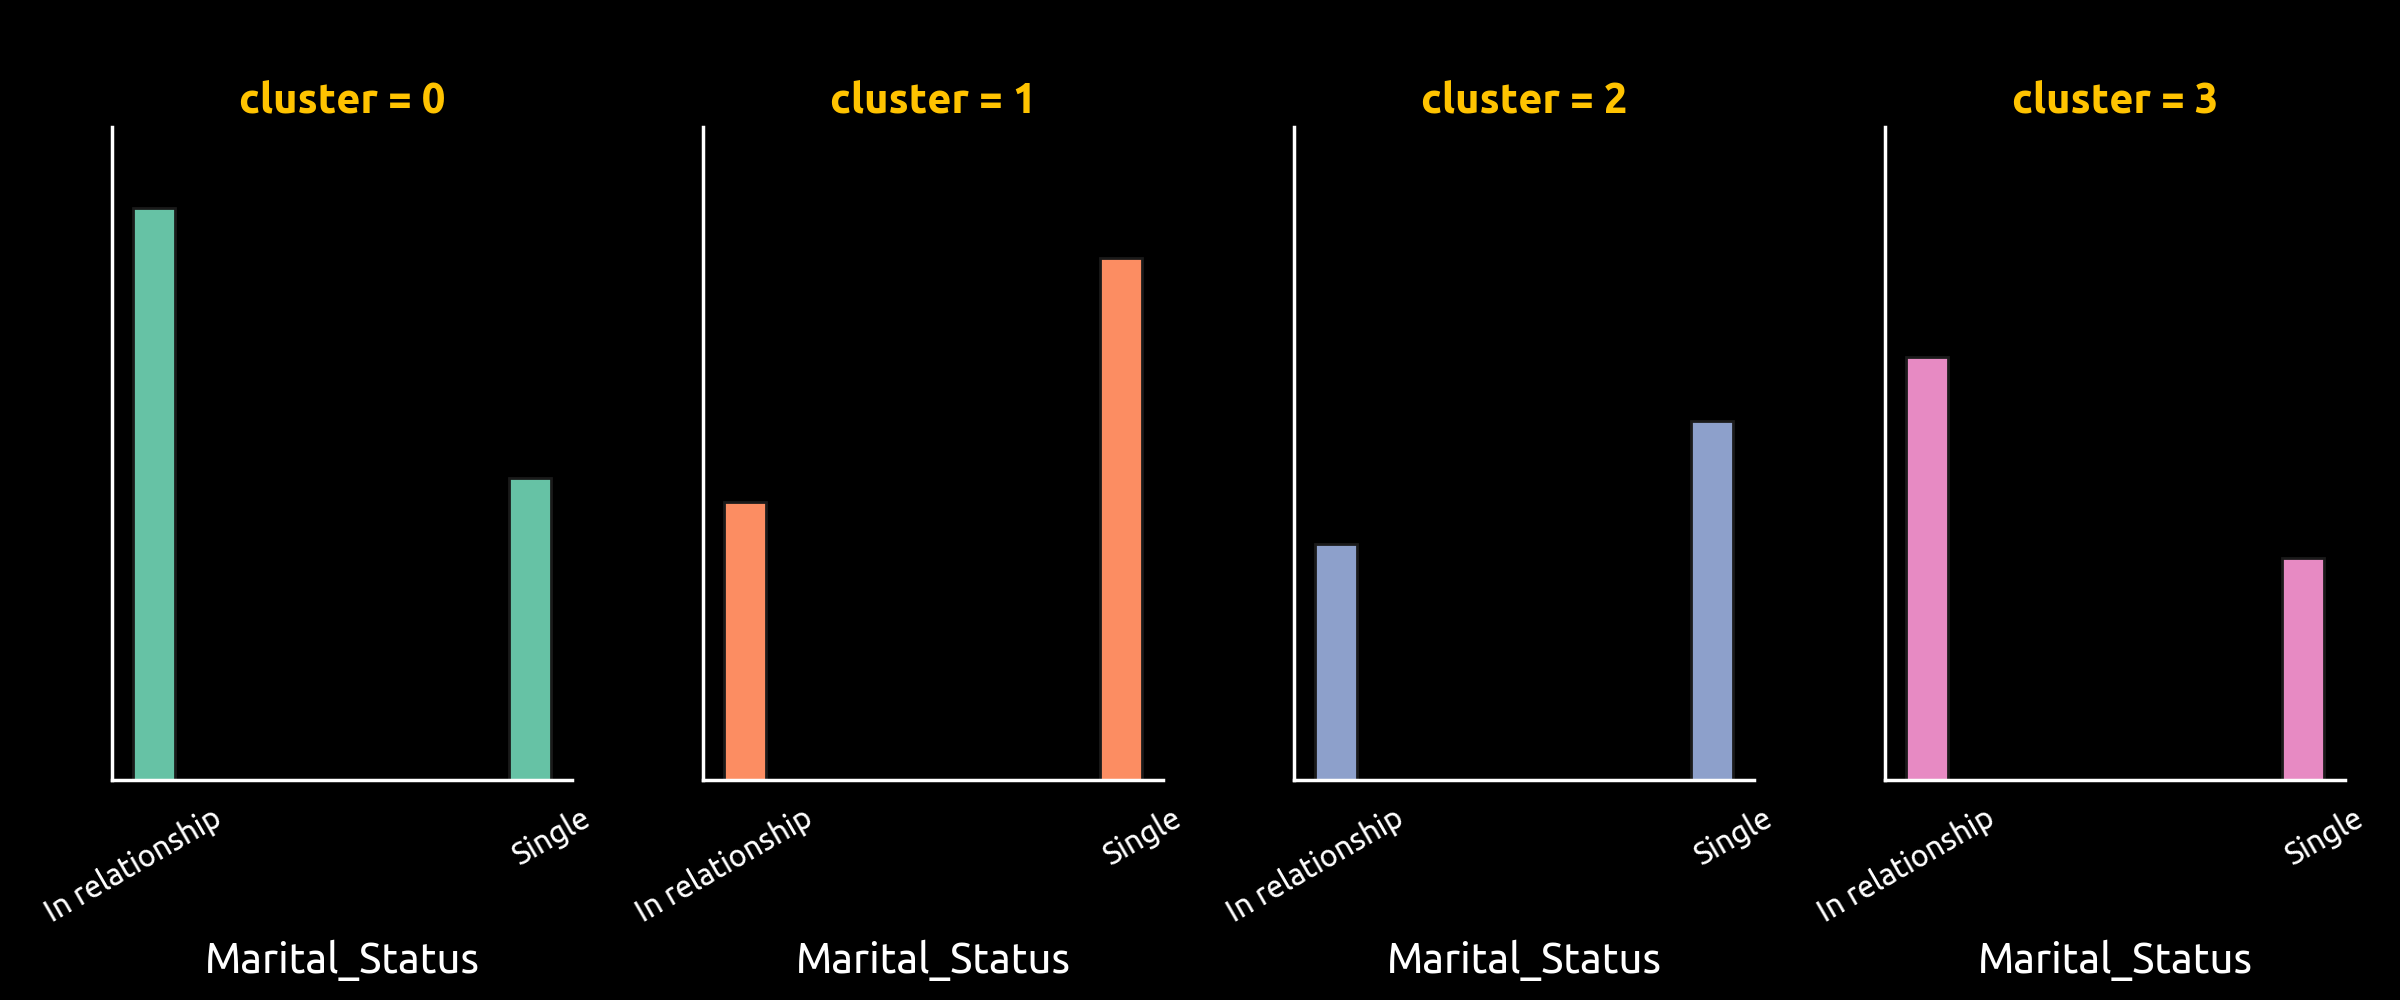

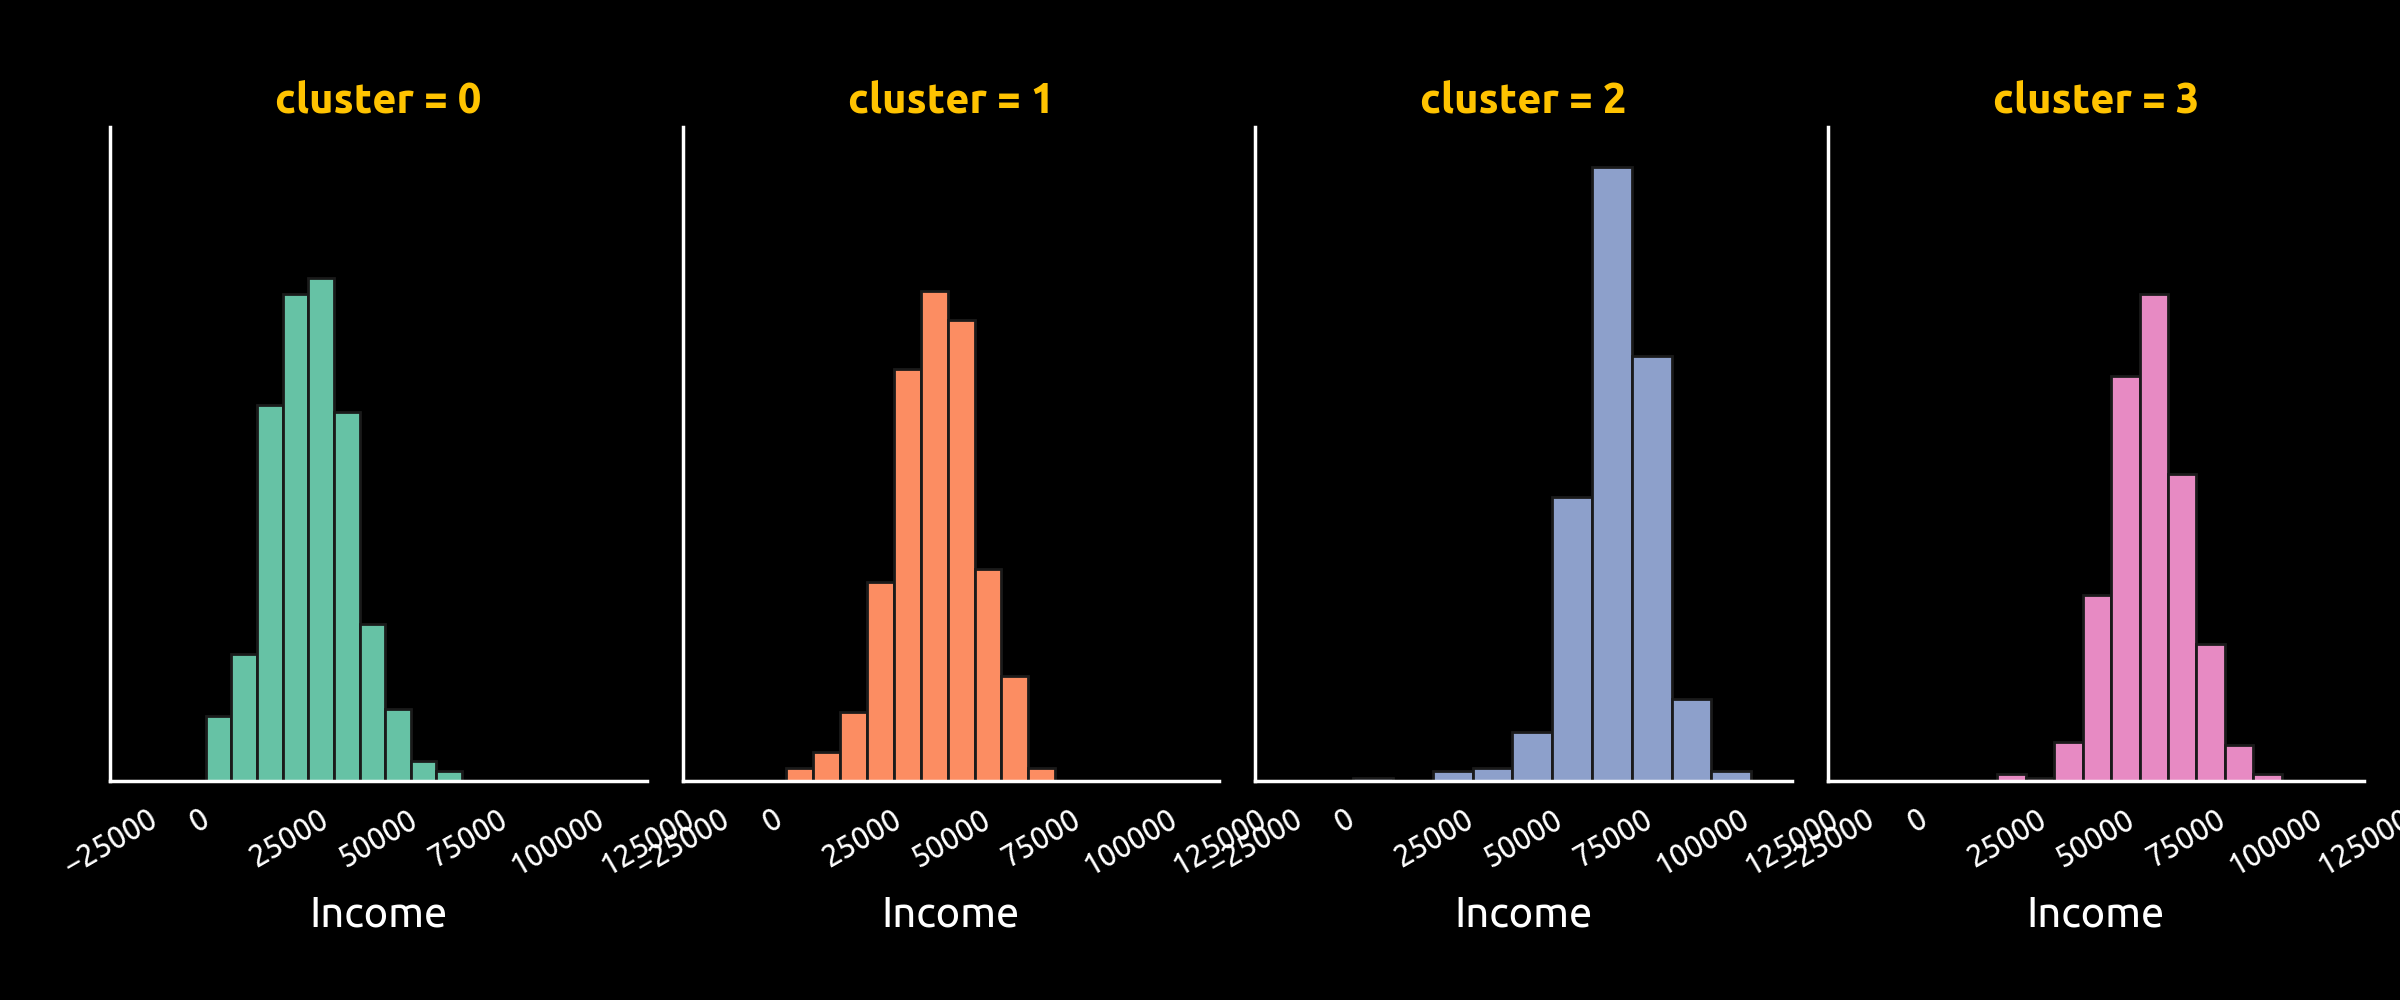

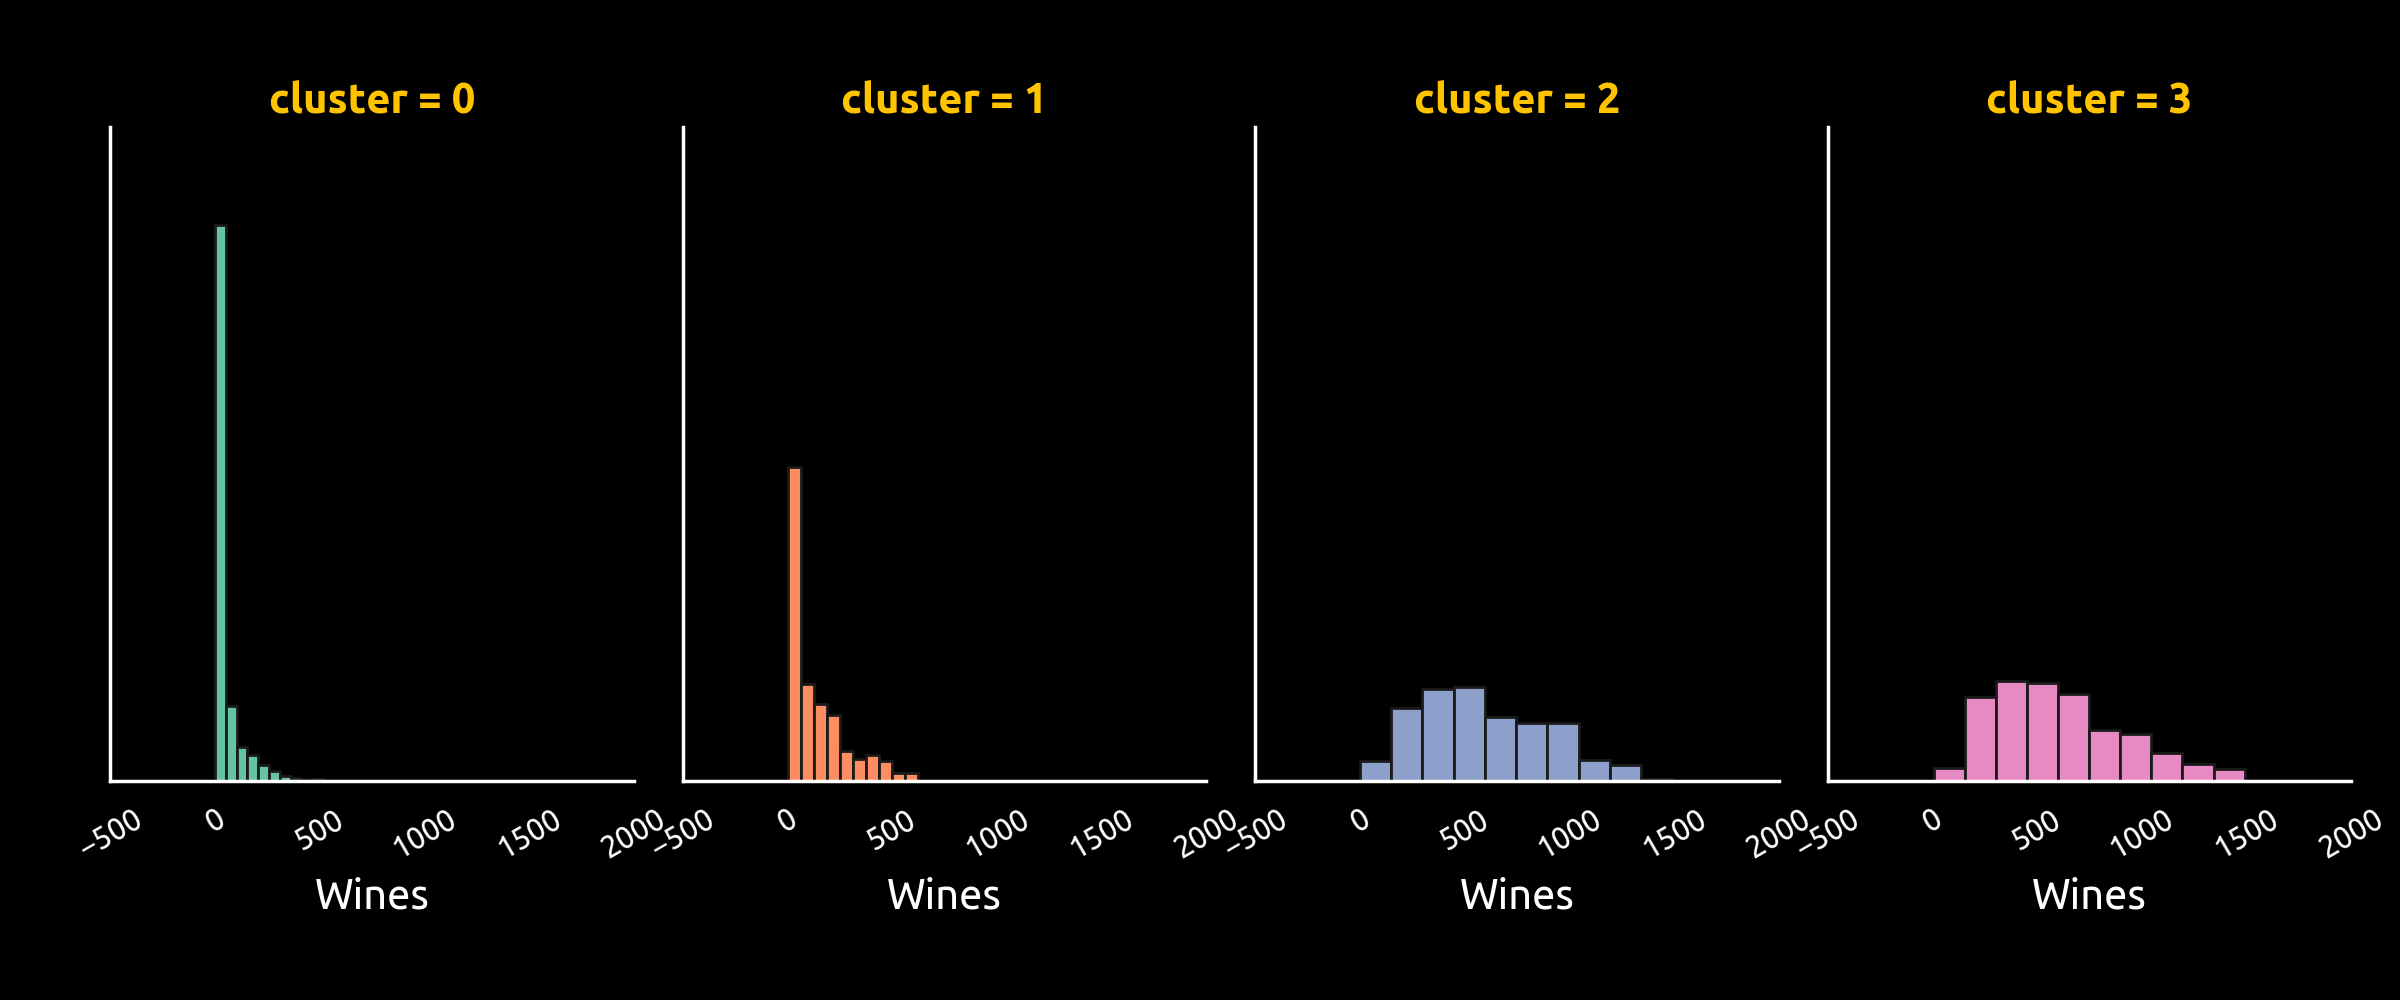

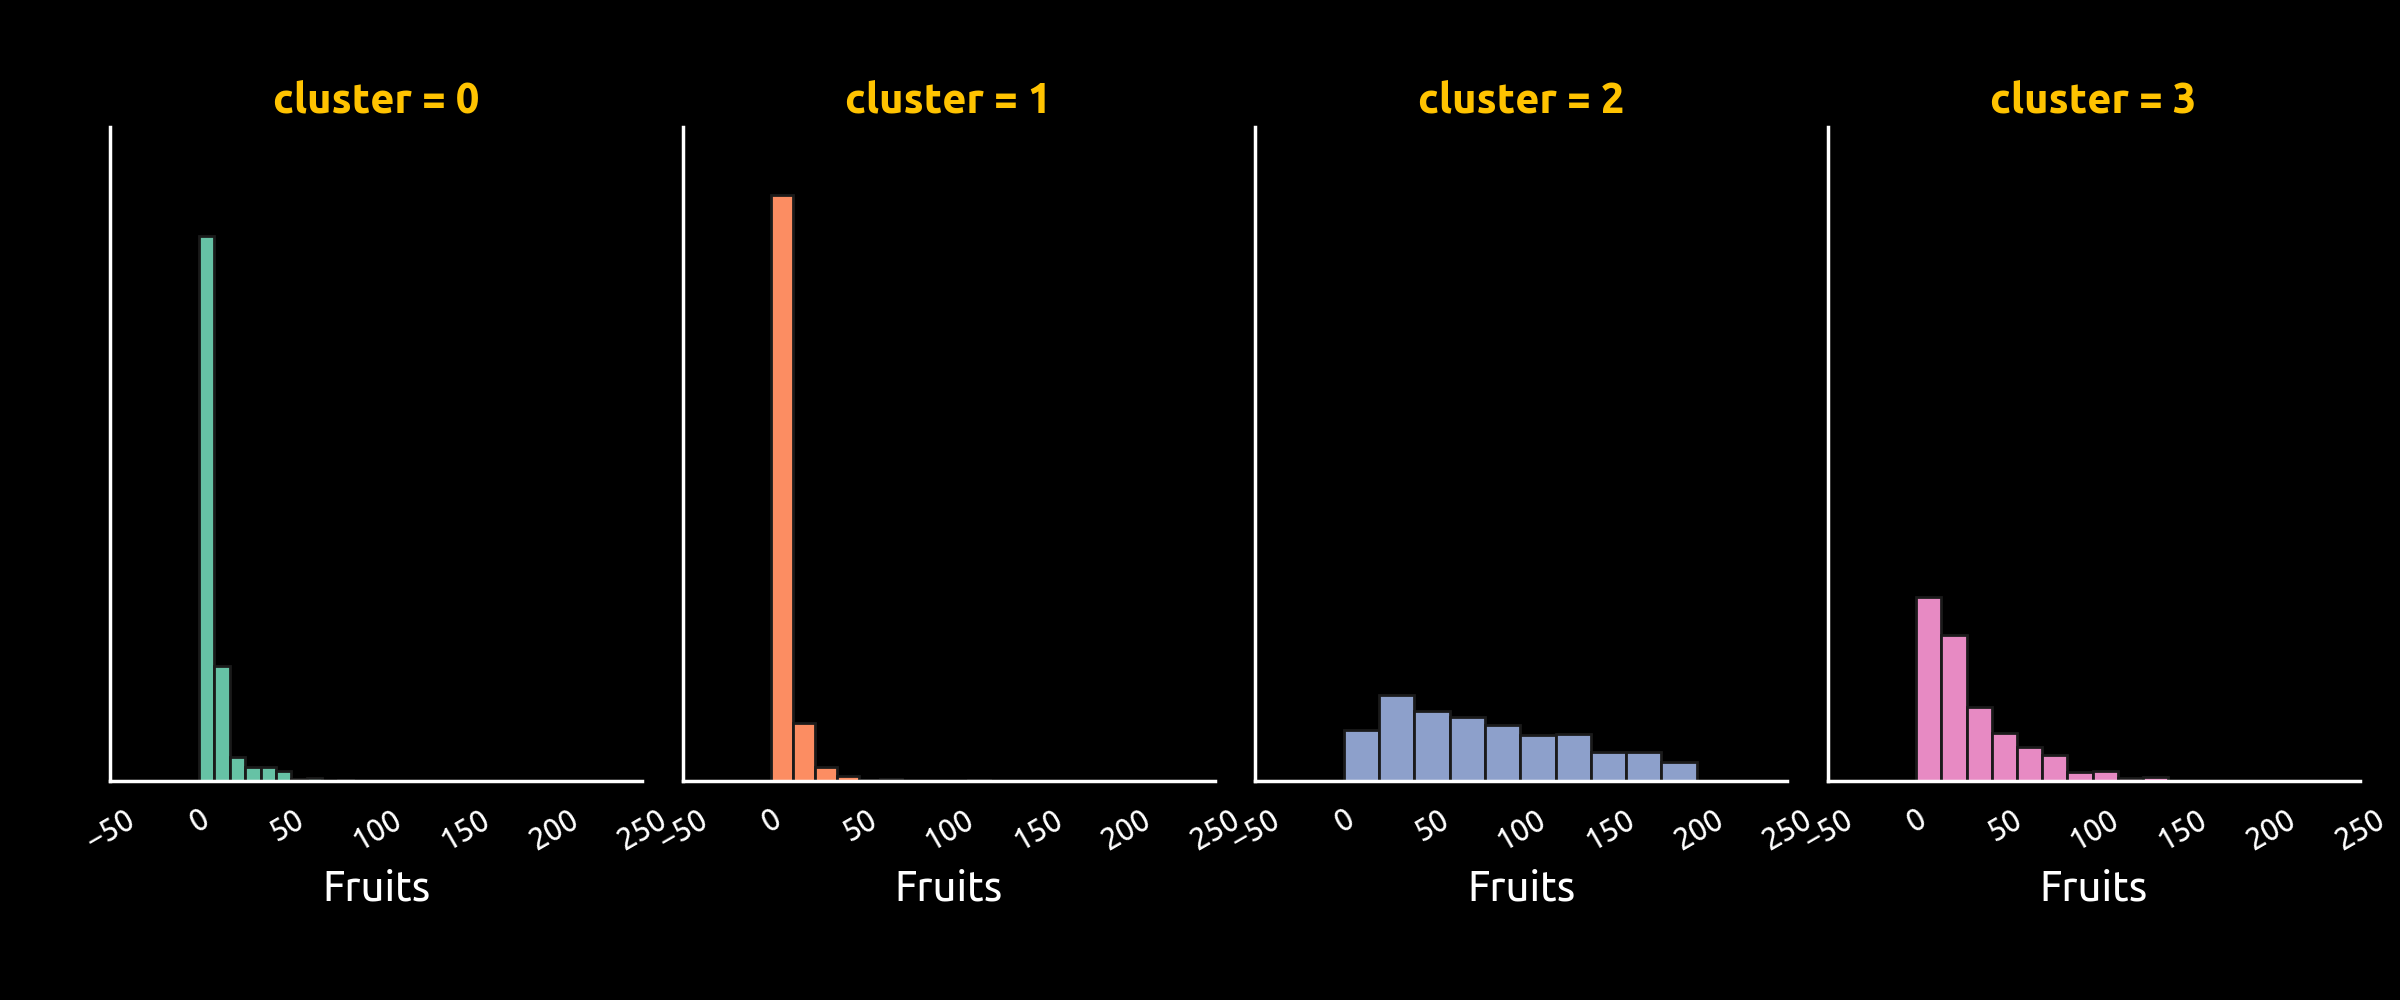

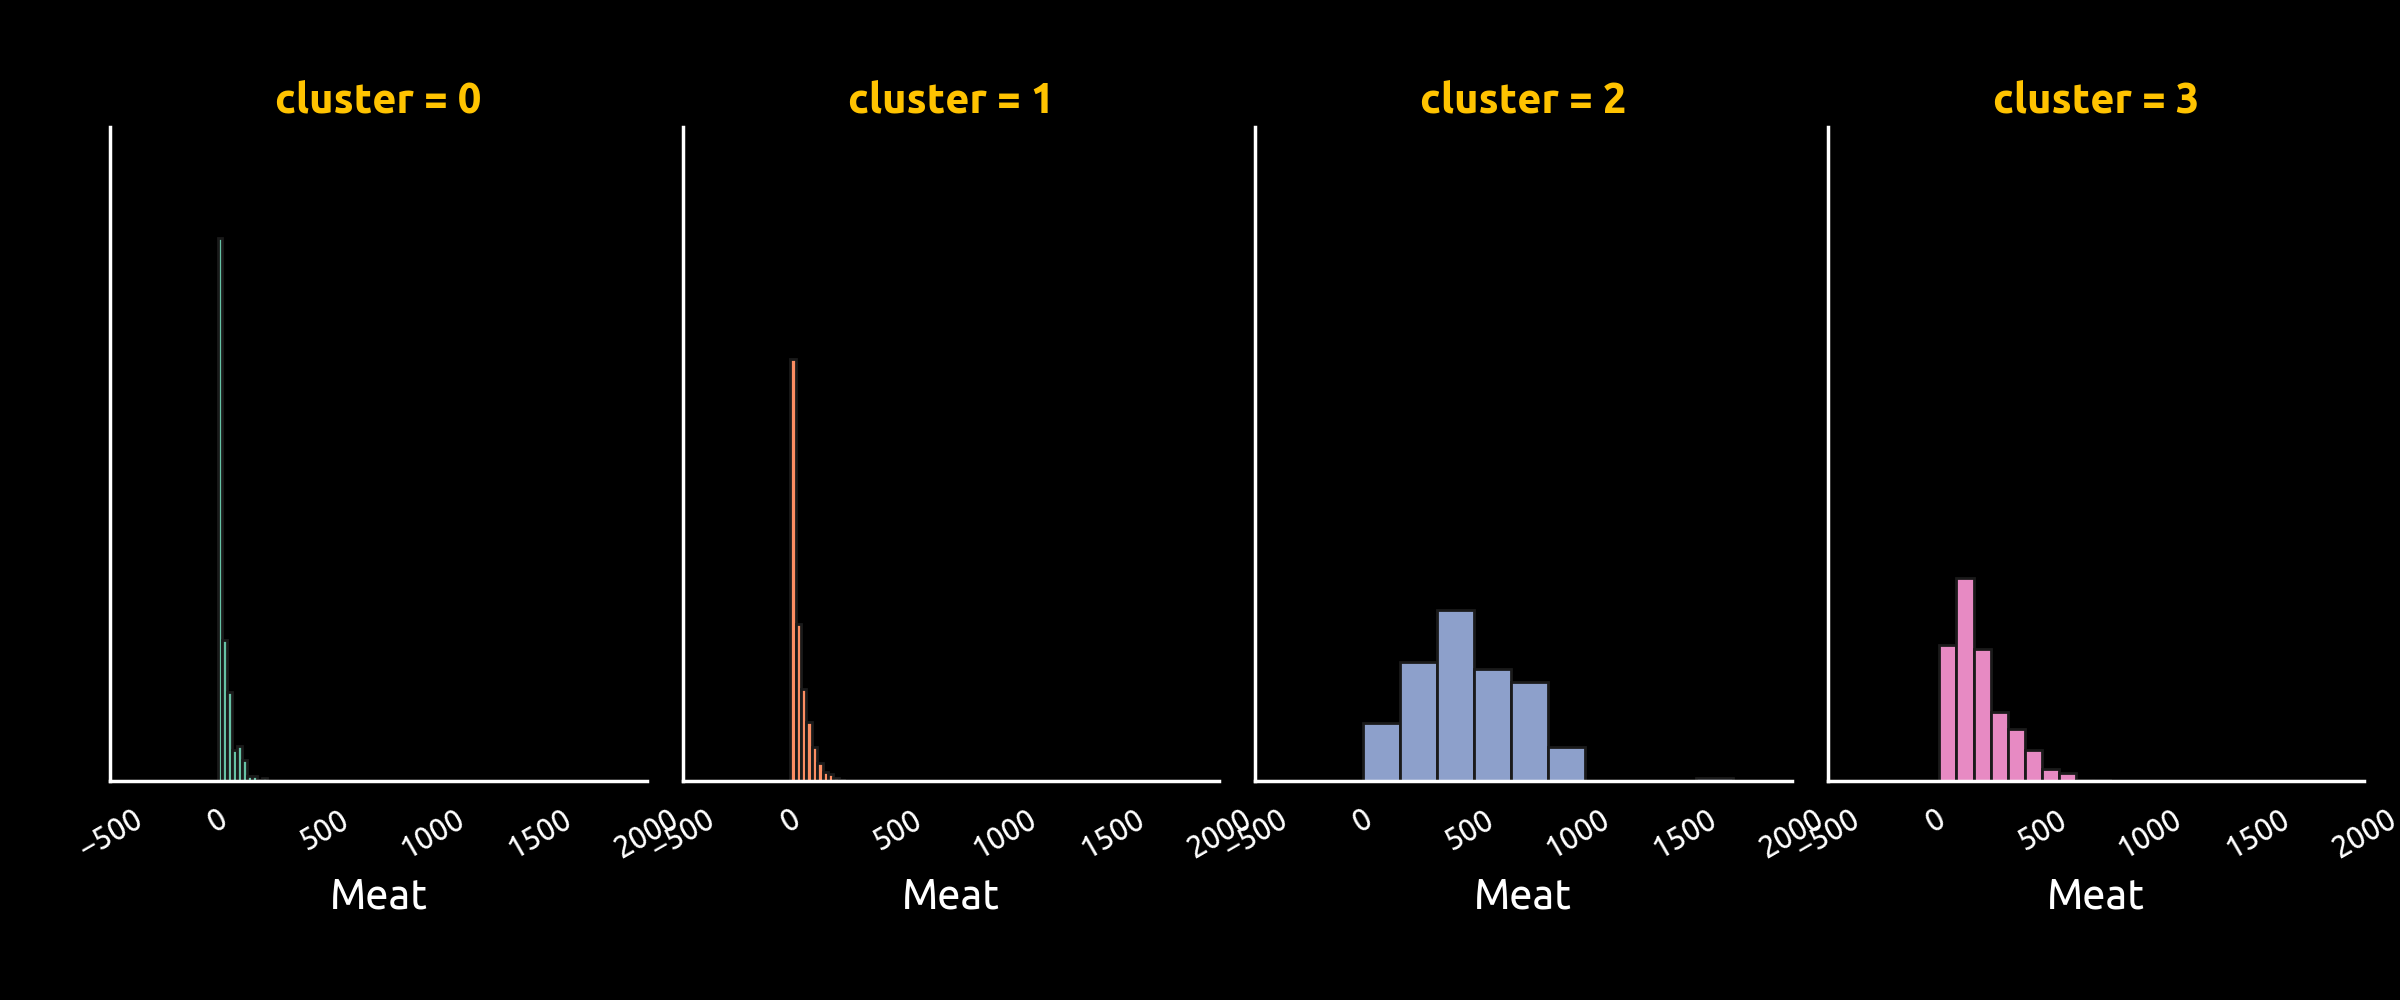

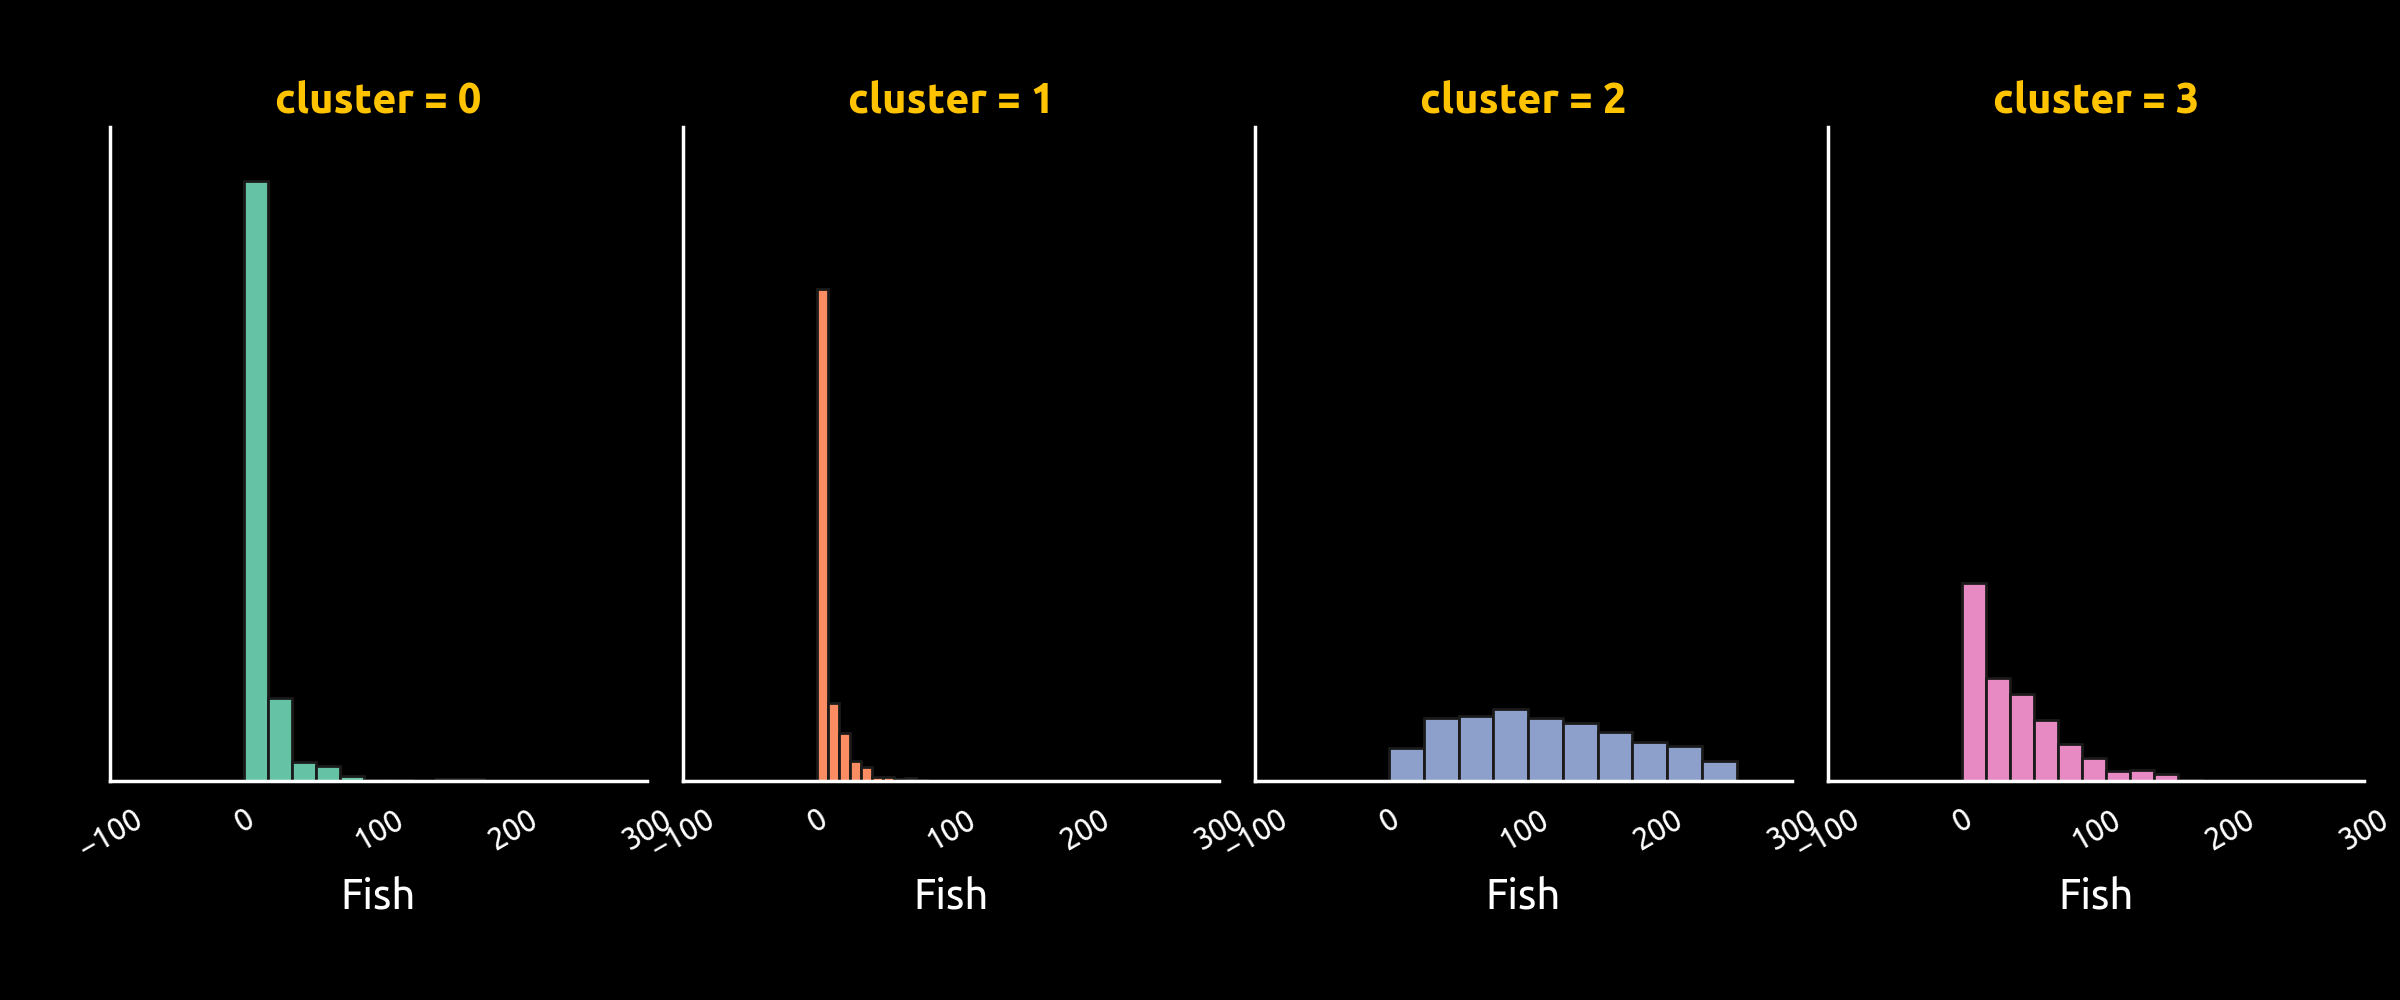

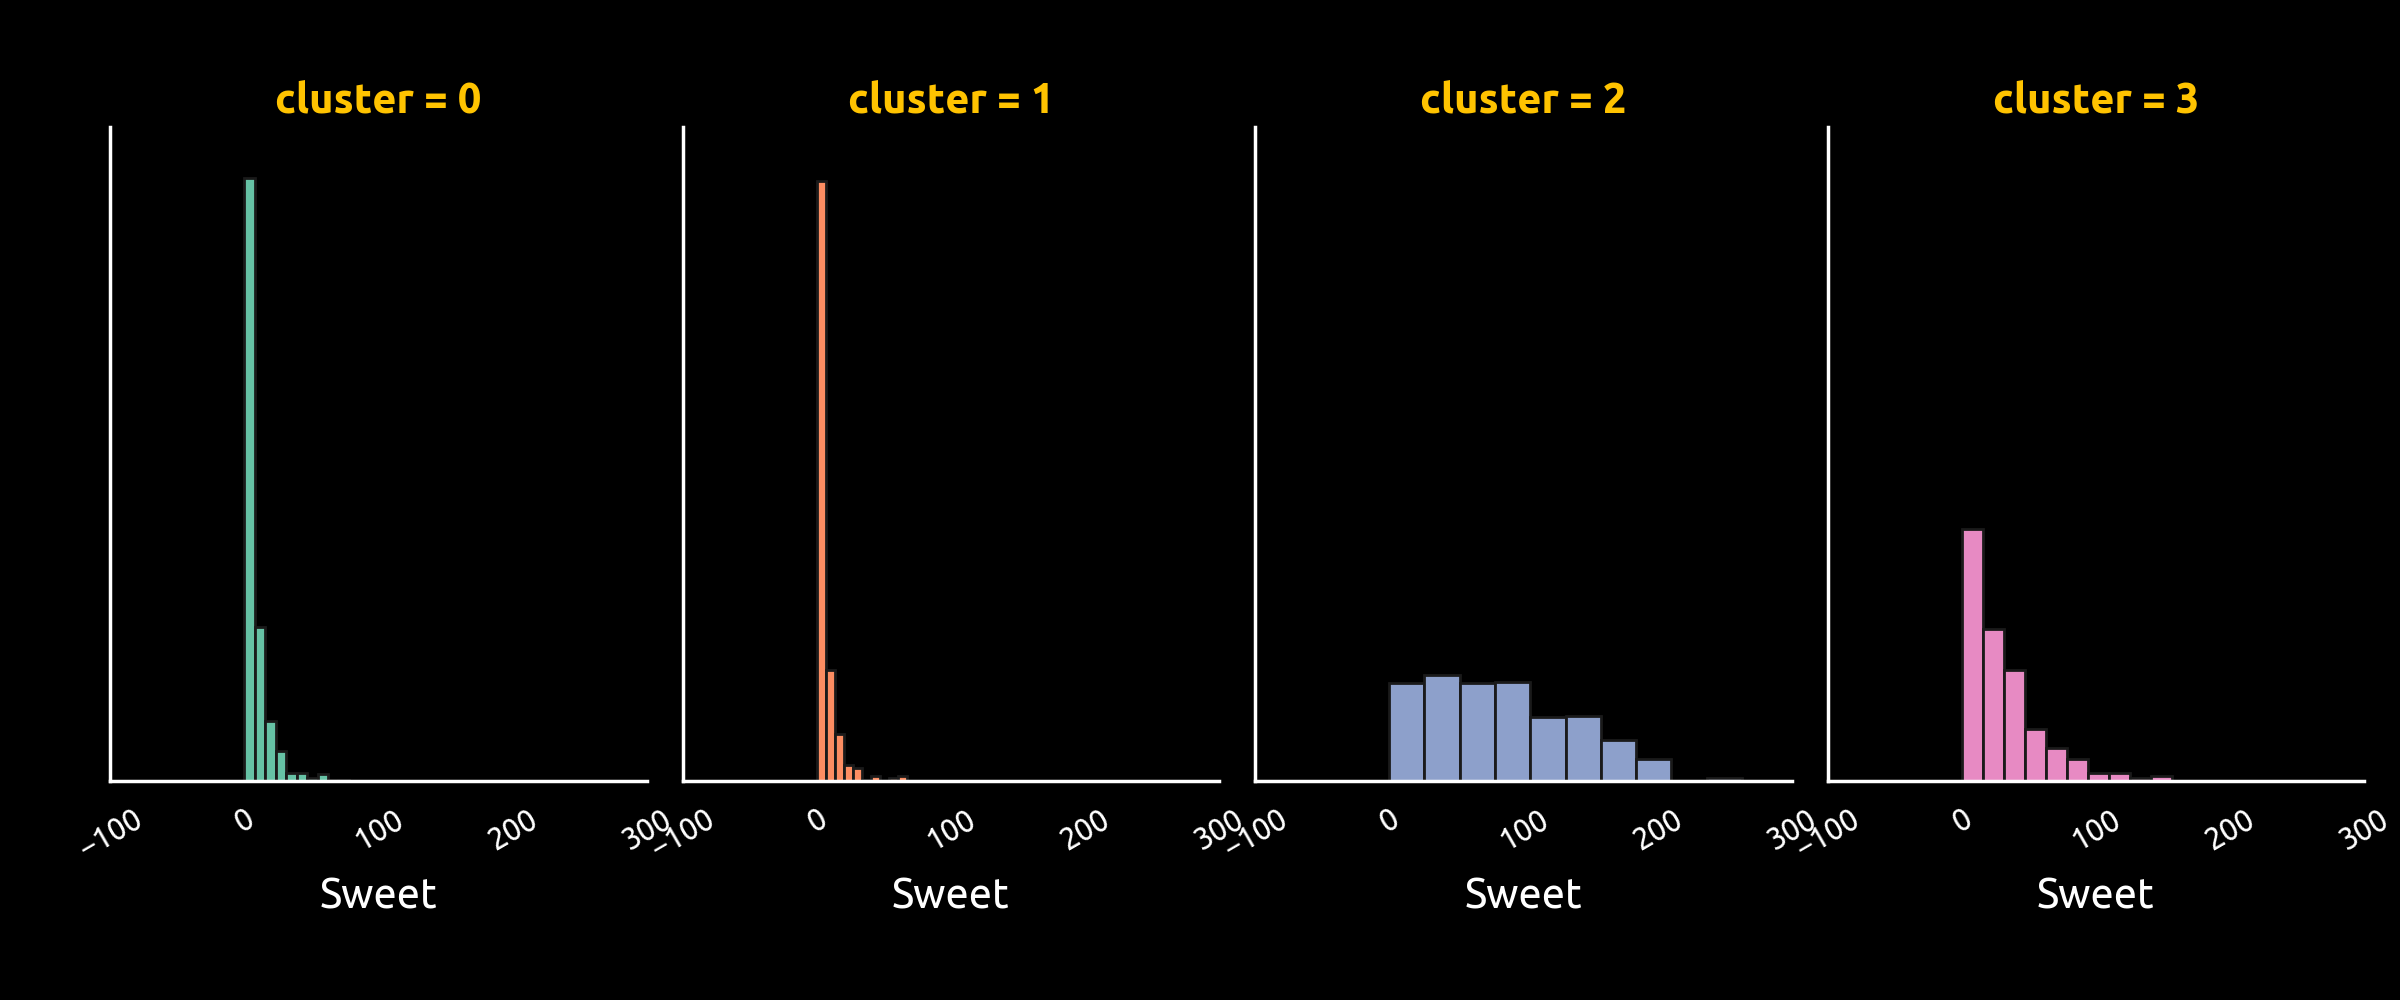

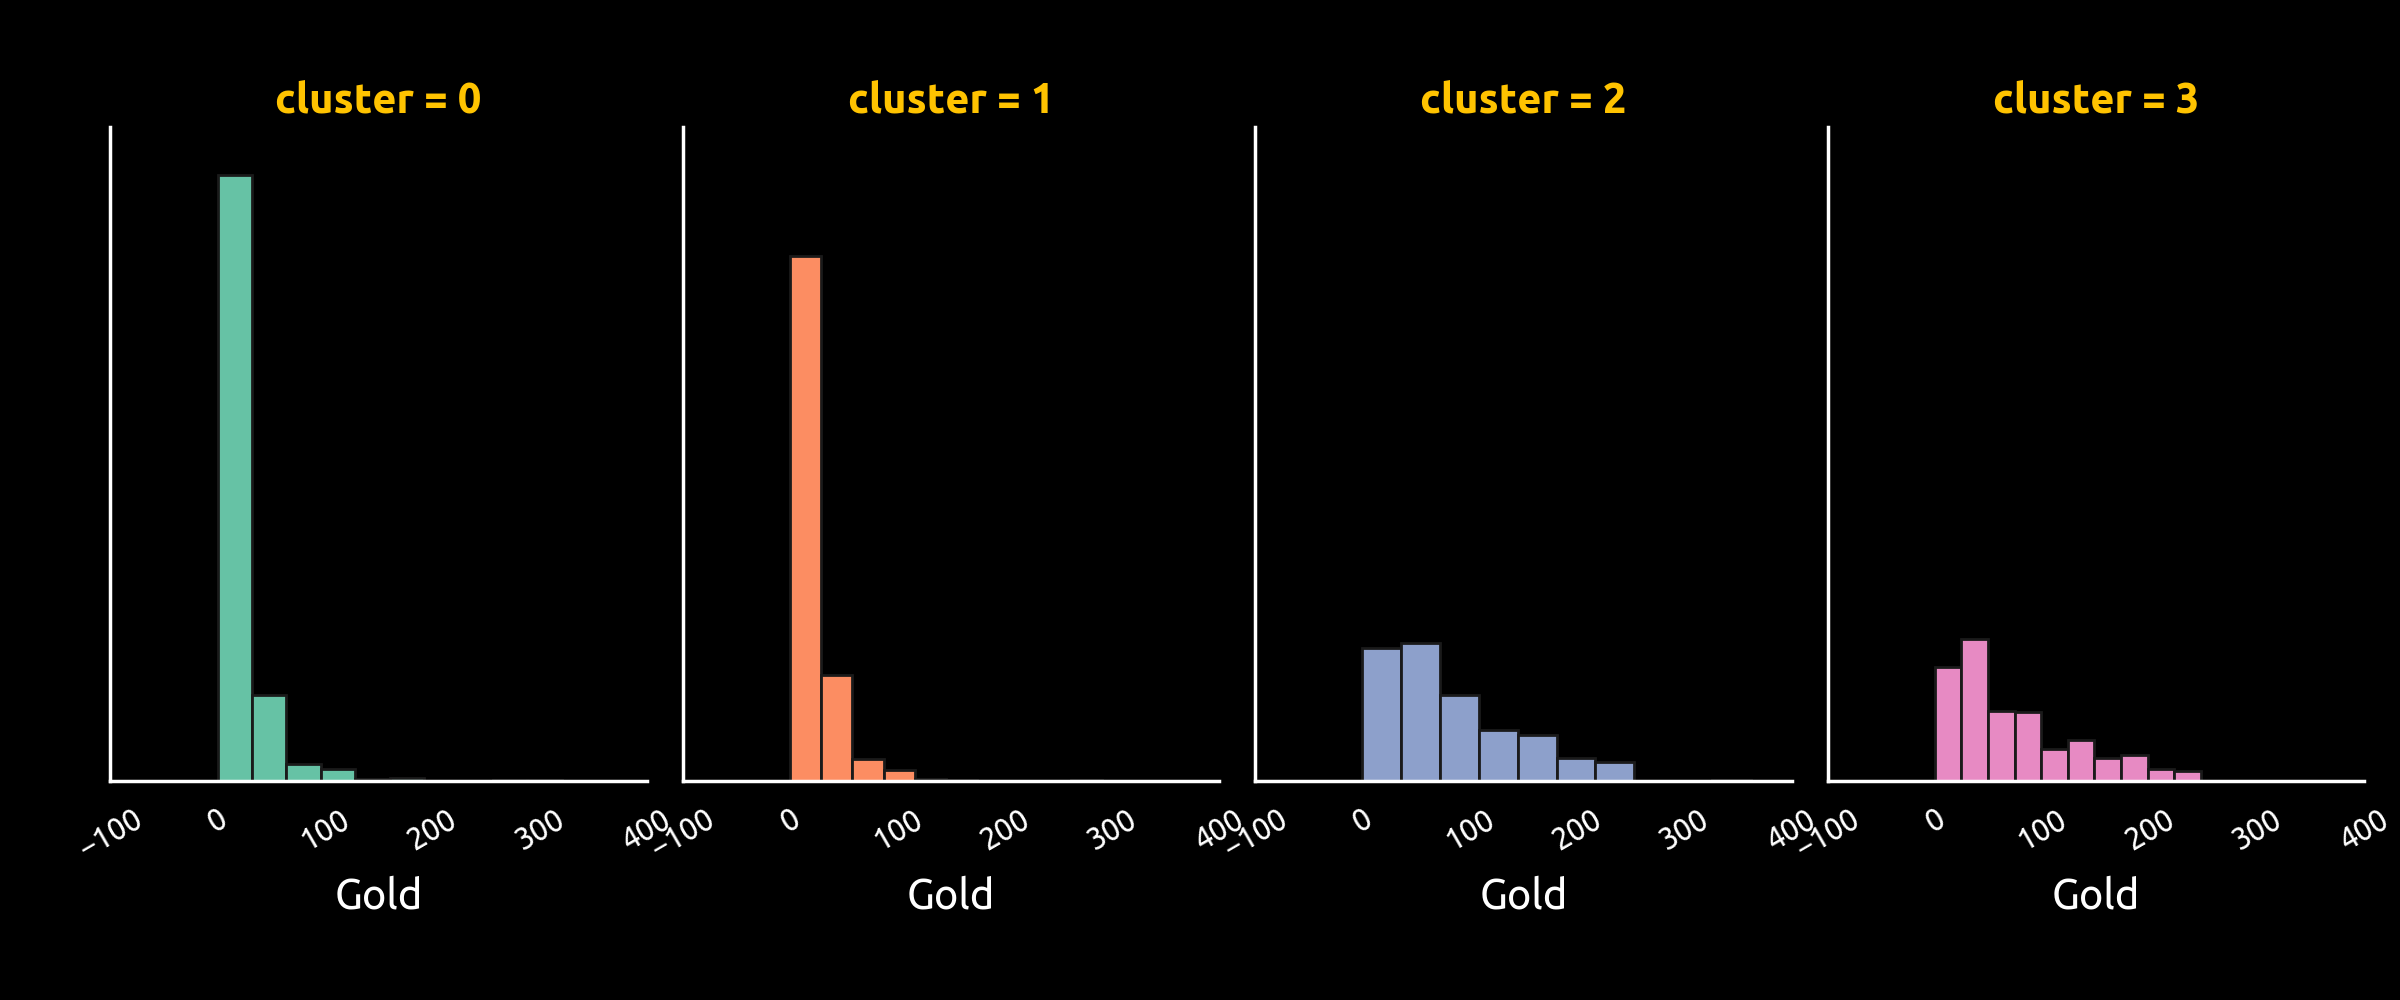

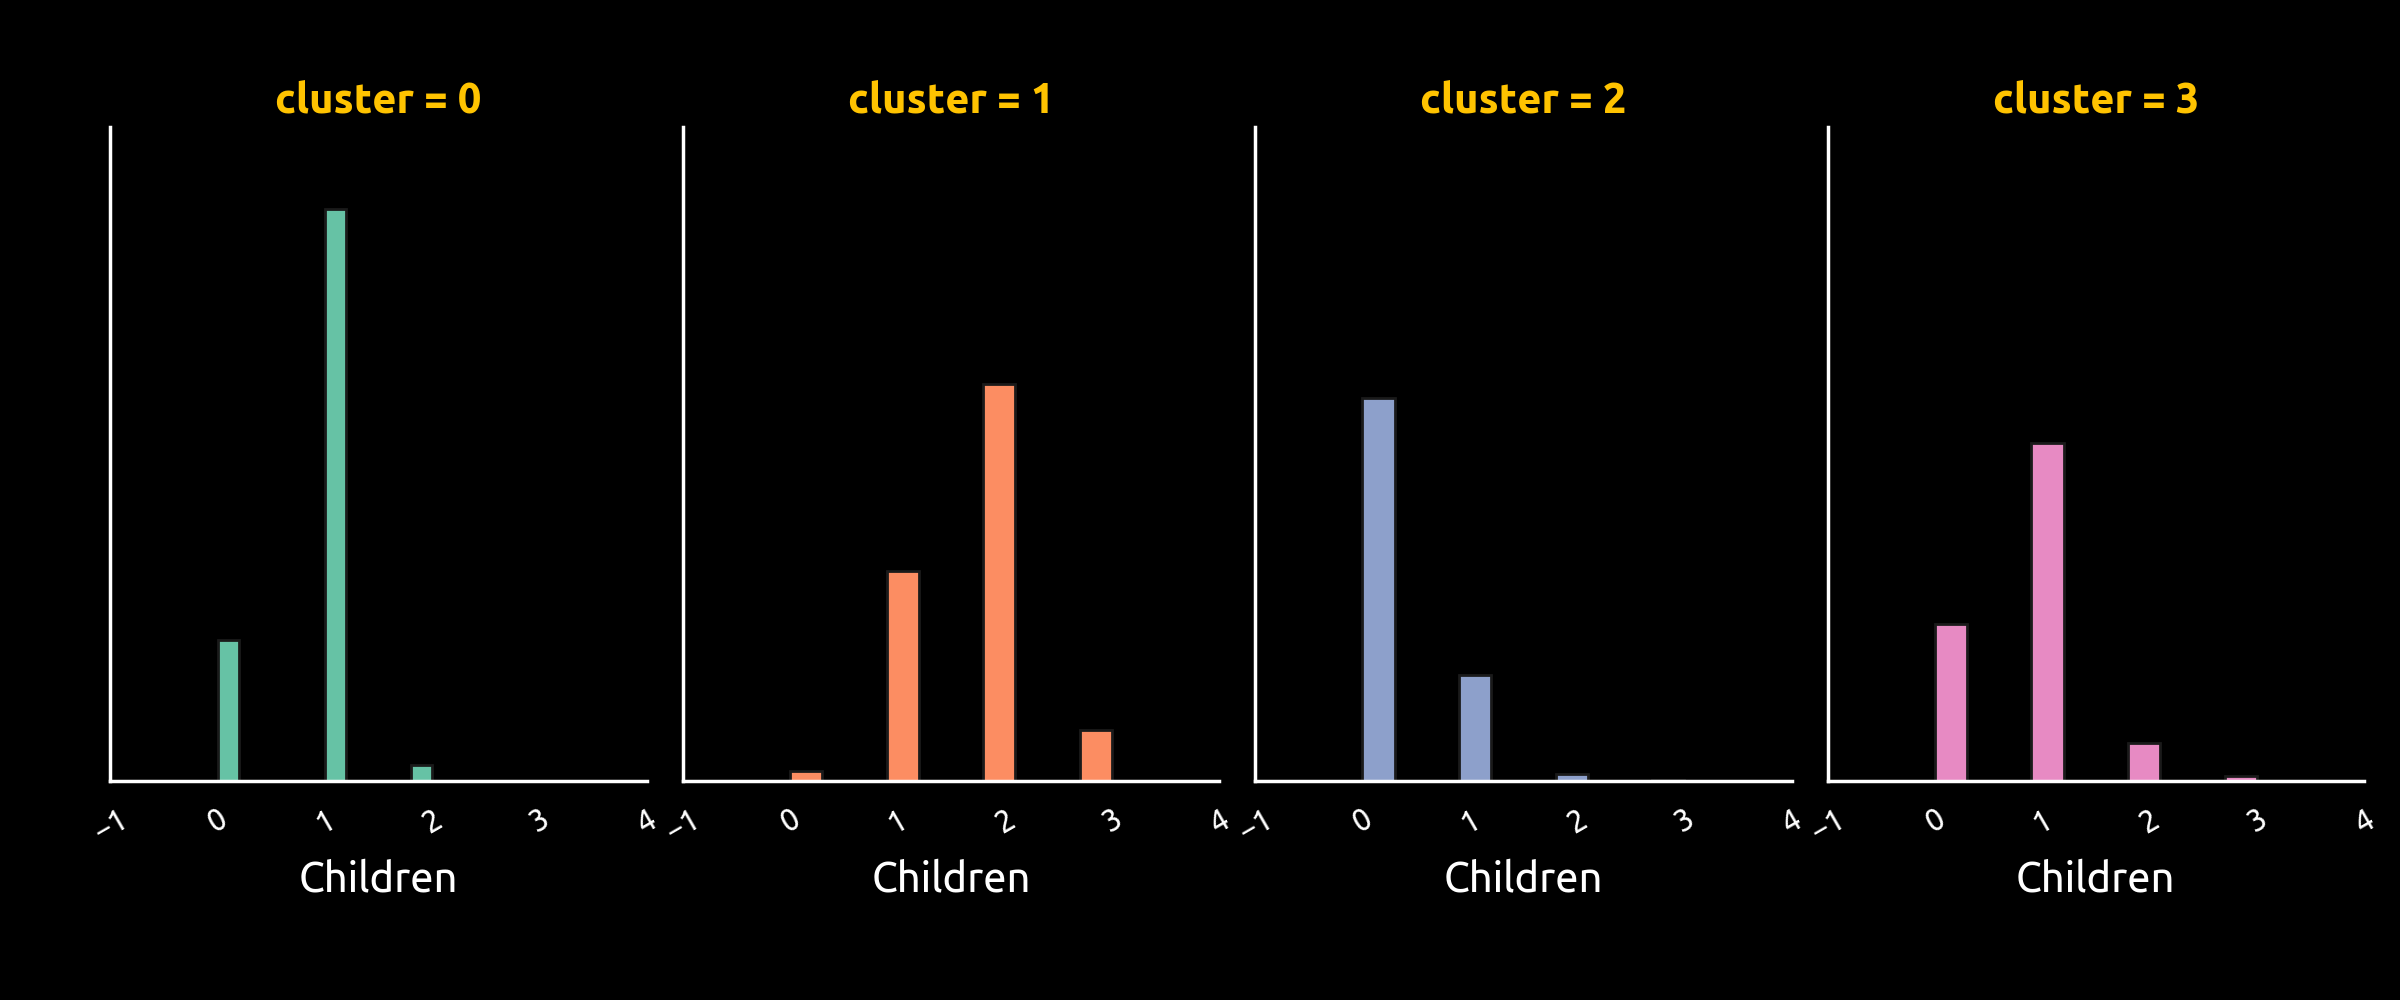

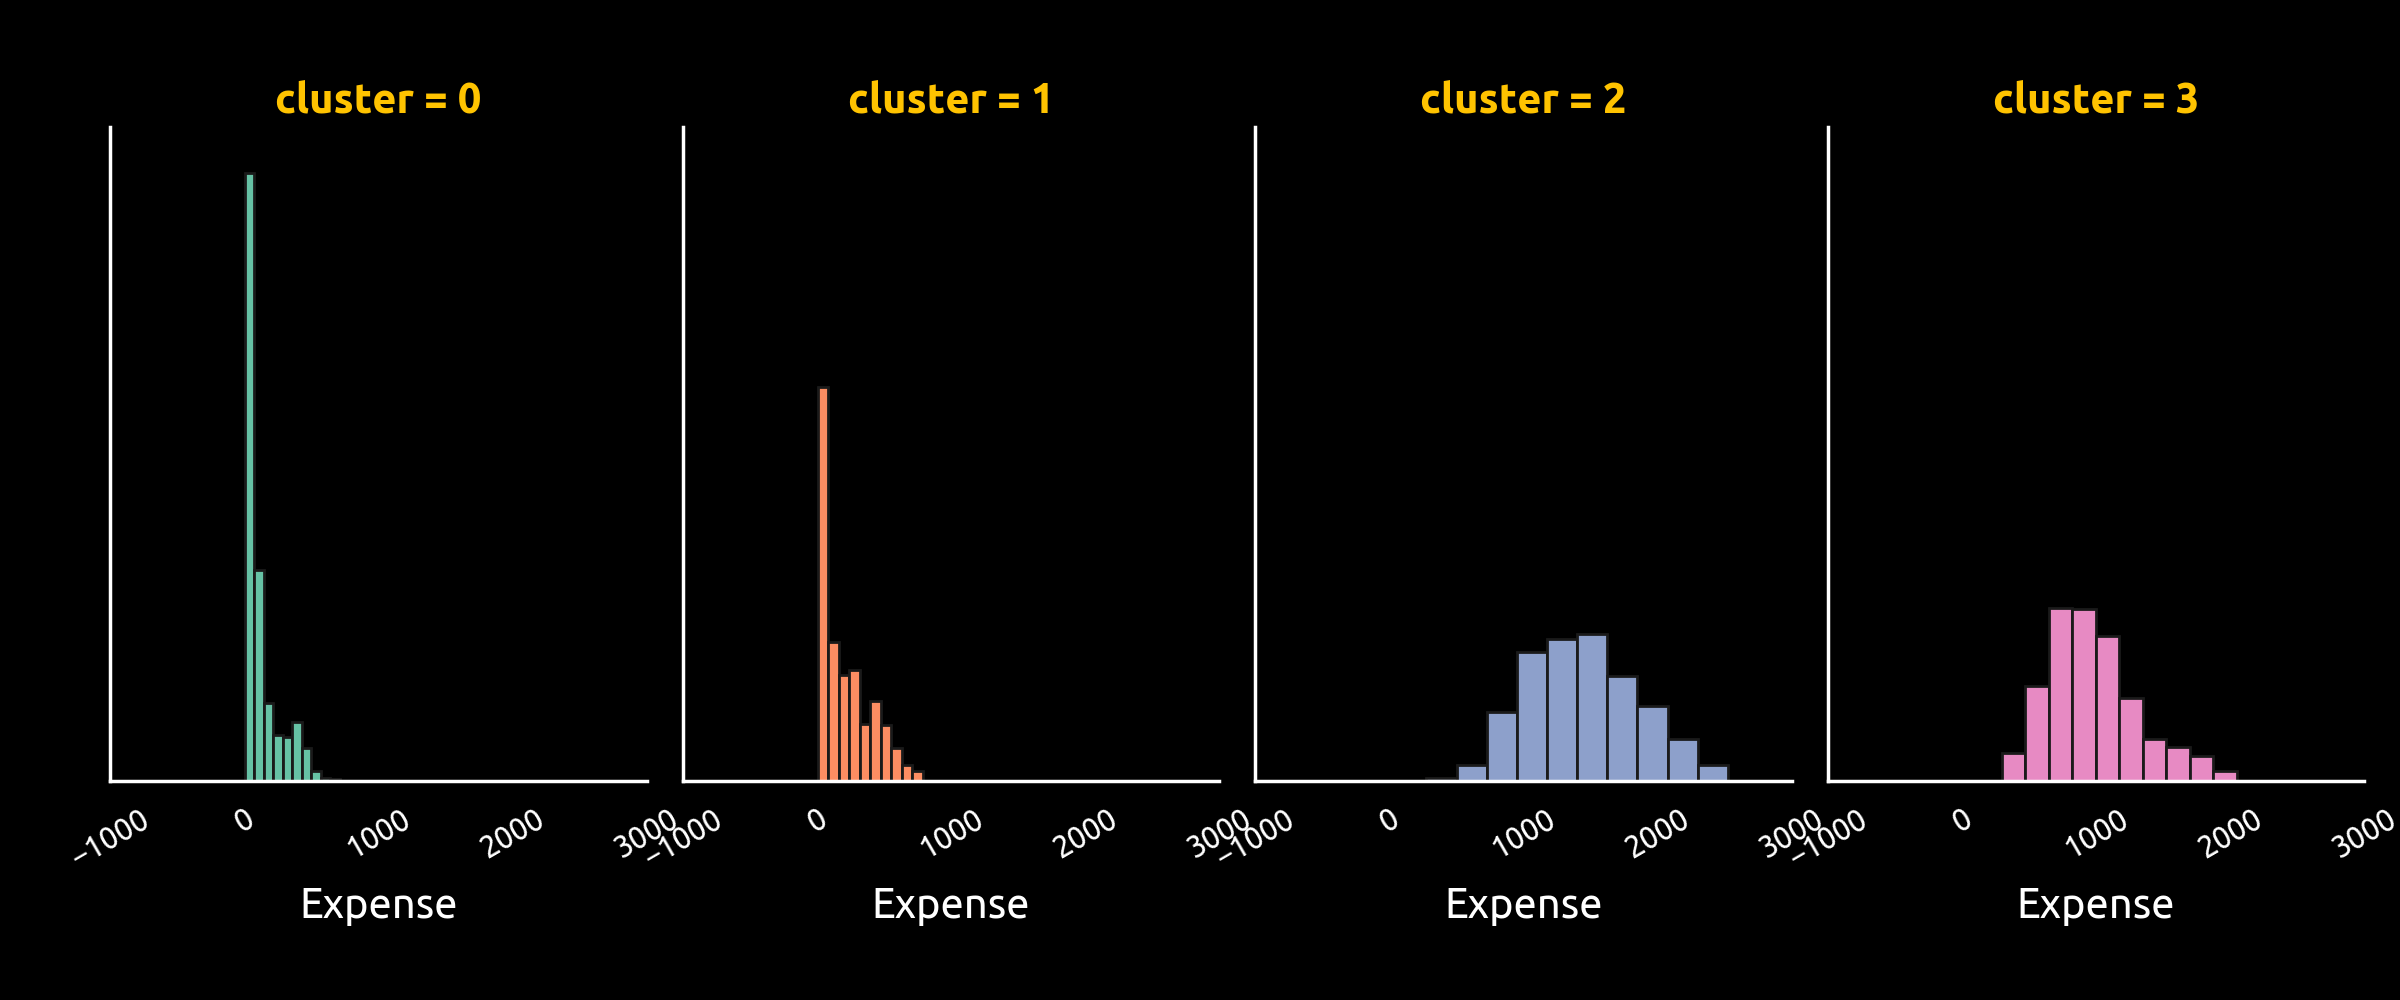

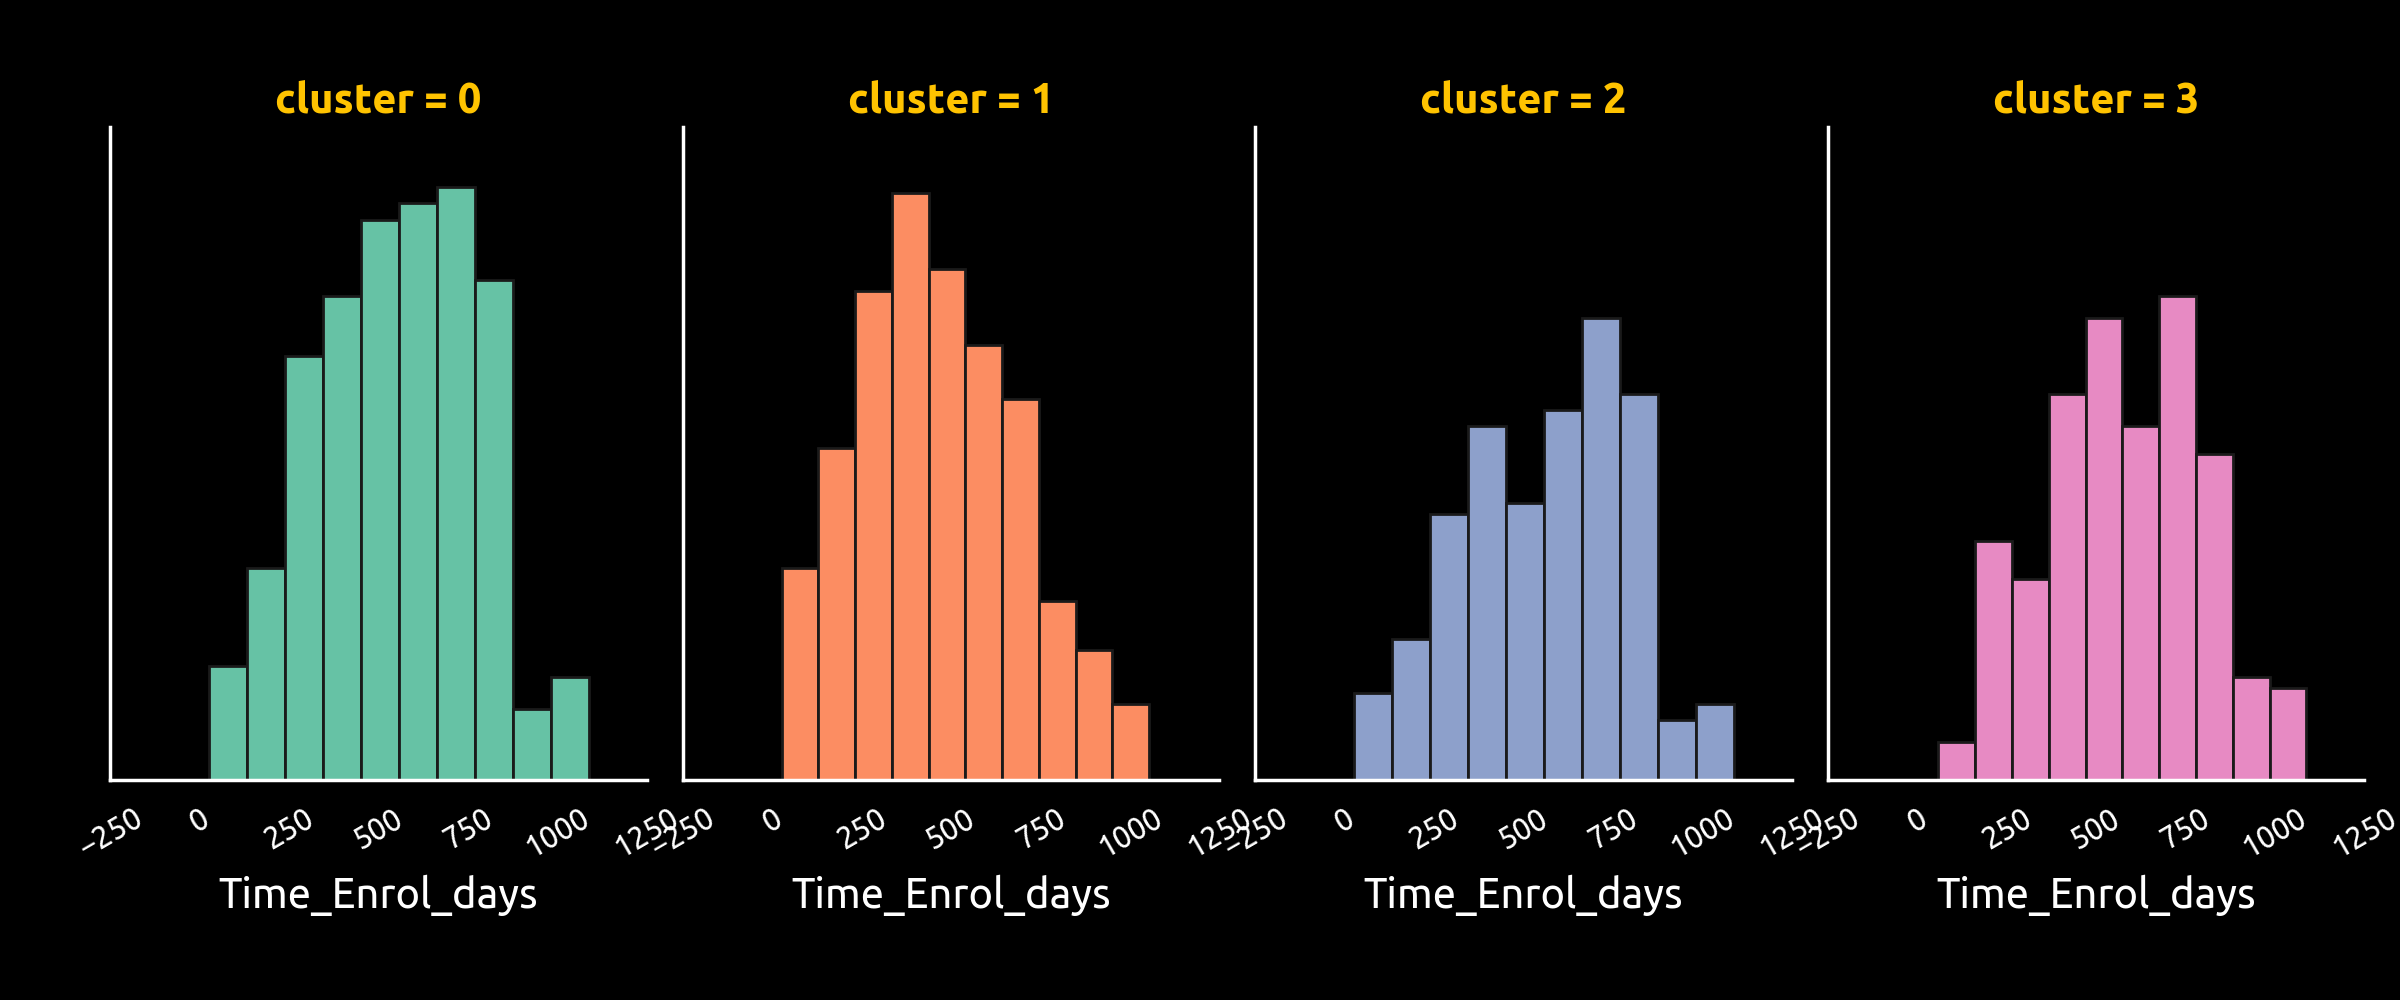

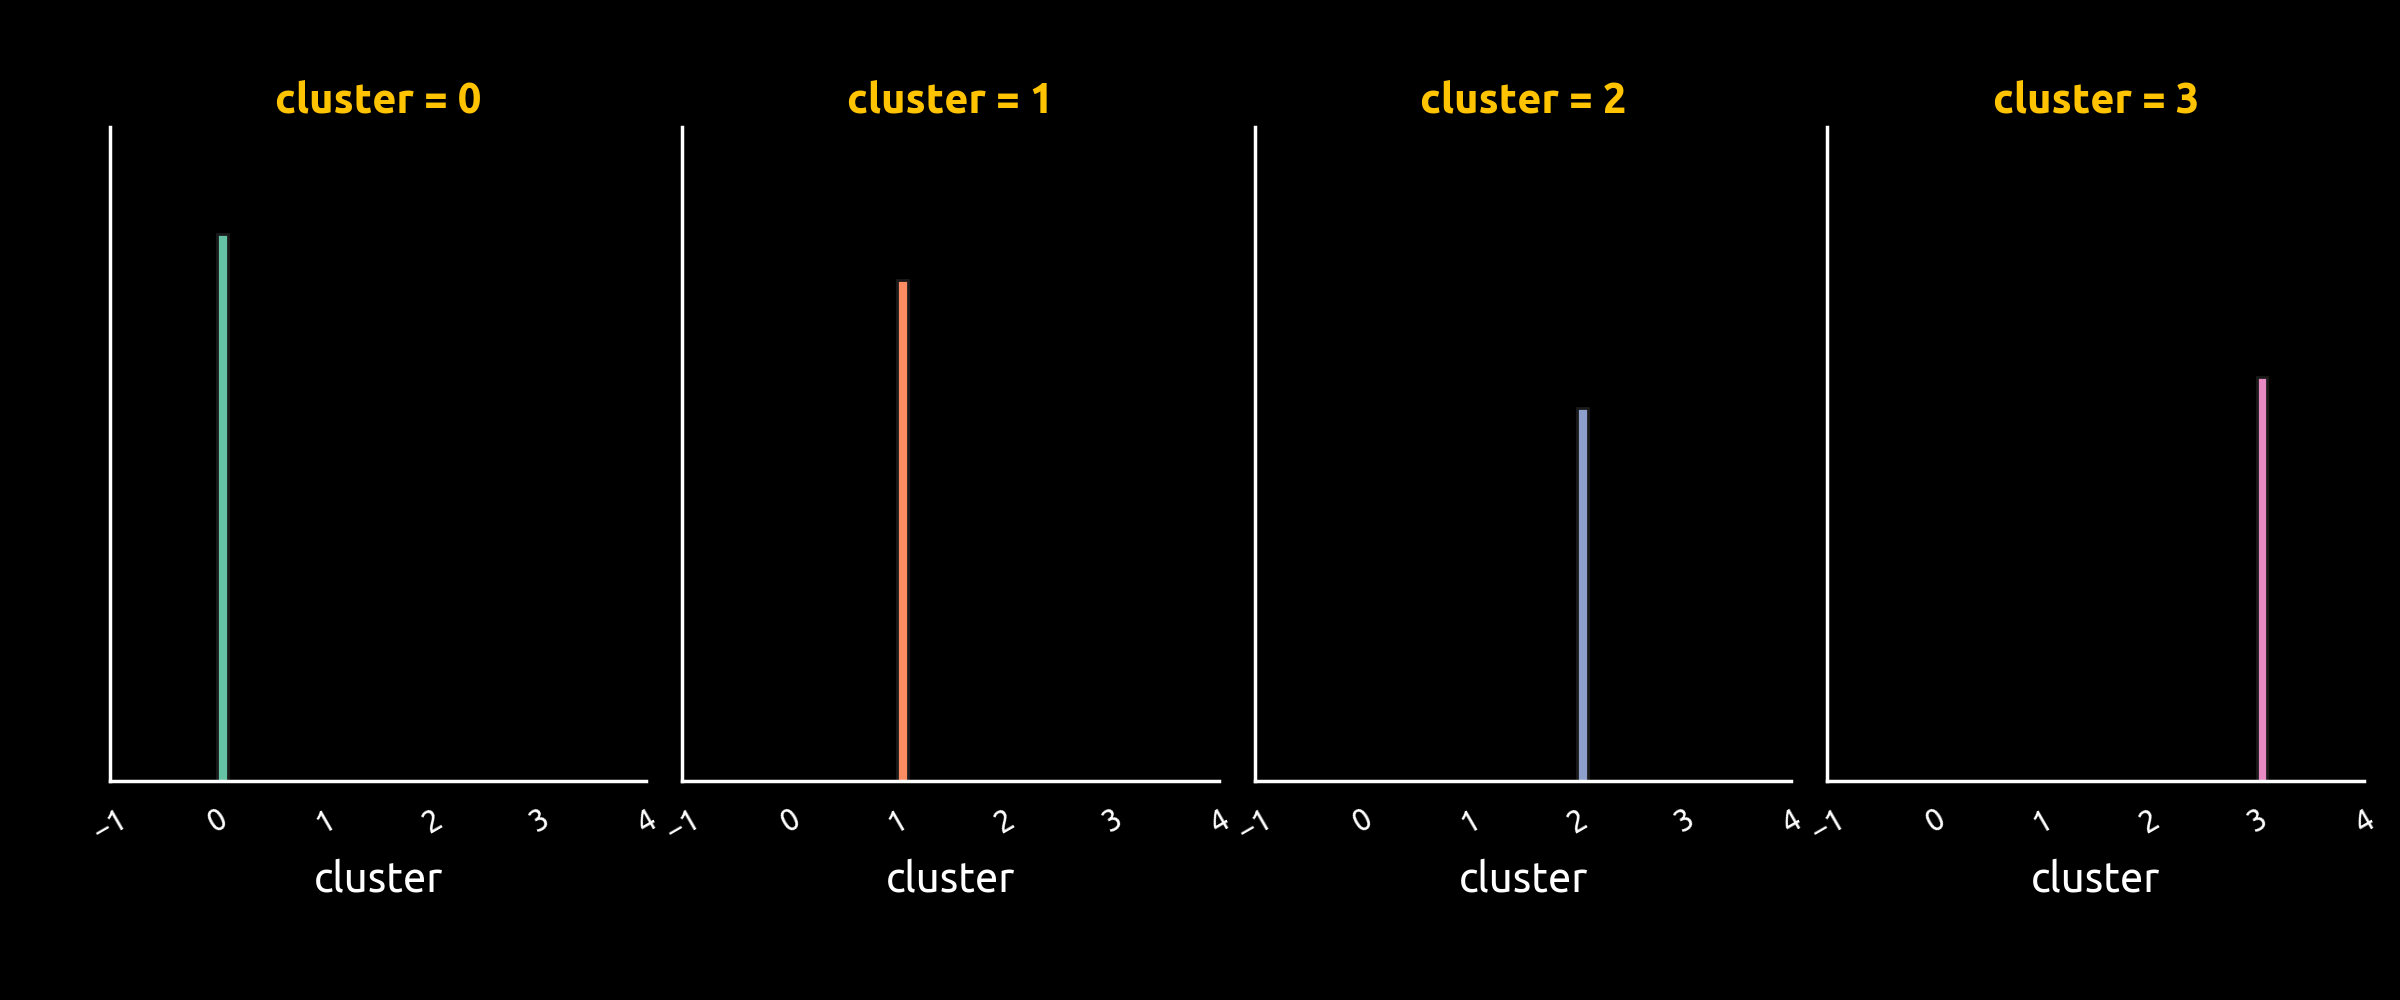

In [ ]:
#cluster interpretion
sns.set(rc = {'axes.facecolor':'black','figure.facecolor':'black','axes.grid':False,'font.family':'Ubuntu'})

for i in df_clusters:
  g = sns.FacetGrid(df_clusters, col='cluster',hue='cluster',palette='Set2')
  g.map(plt.hist,i,bins=10,ec="k")
  g.set_xticklabels(rotation=30,color='white')
  g.set_yticklabels(color='white')
  g.set_xlabels(size=15,color='white')
  g.set_titles(size=15, color='#FFC300',fontweight='bold')
  g.fig.set_figheight(5)


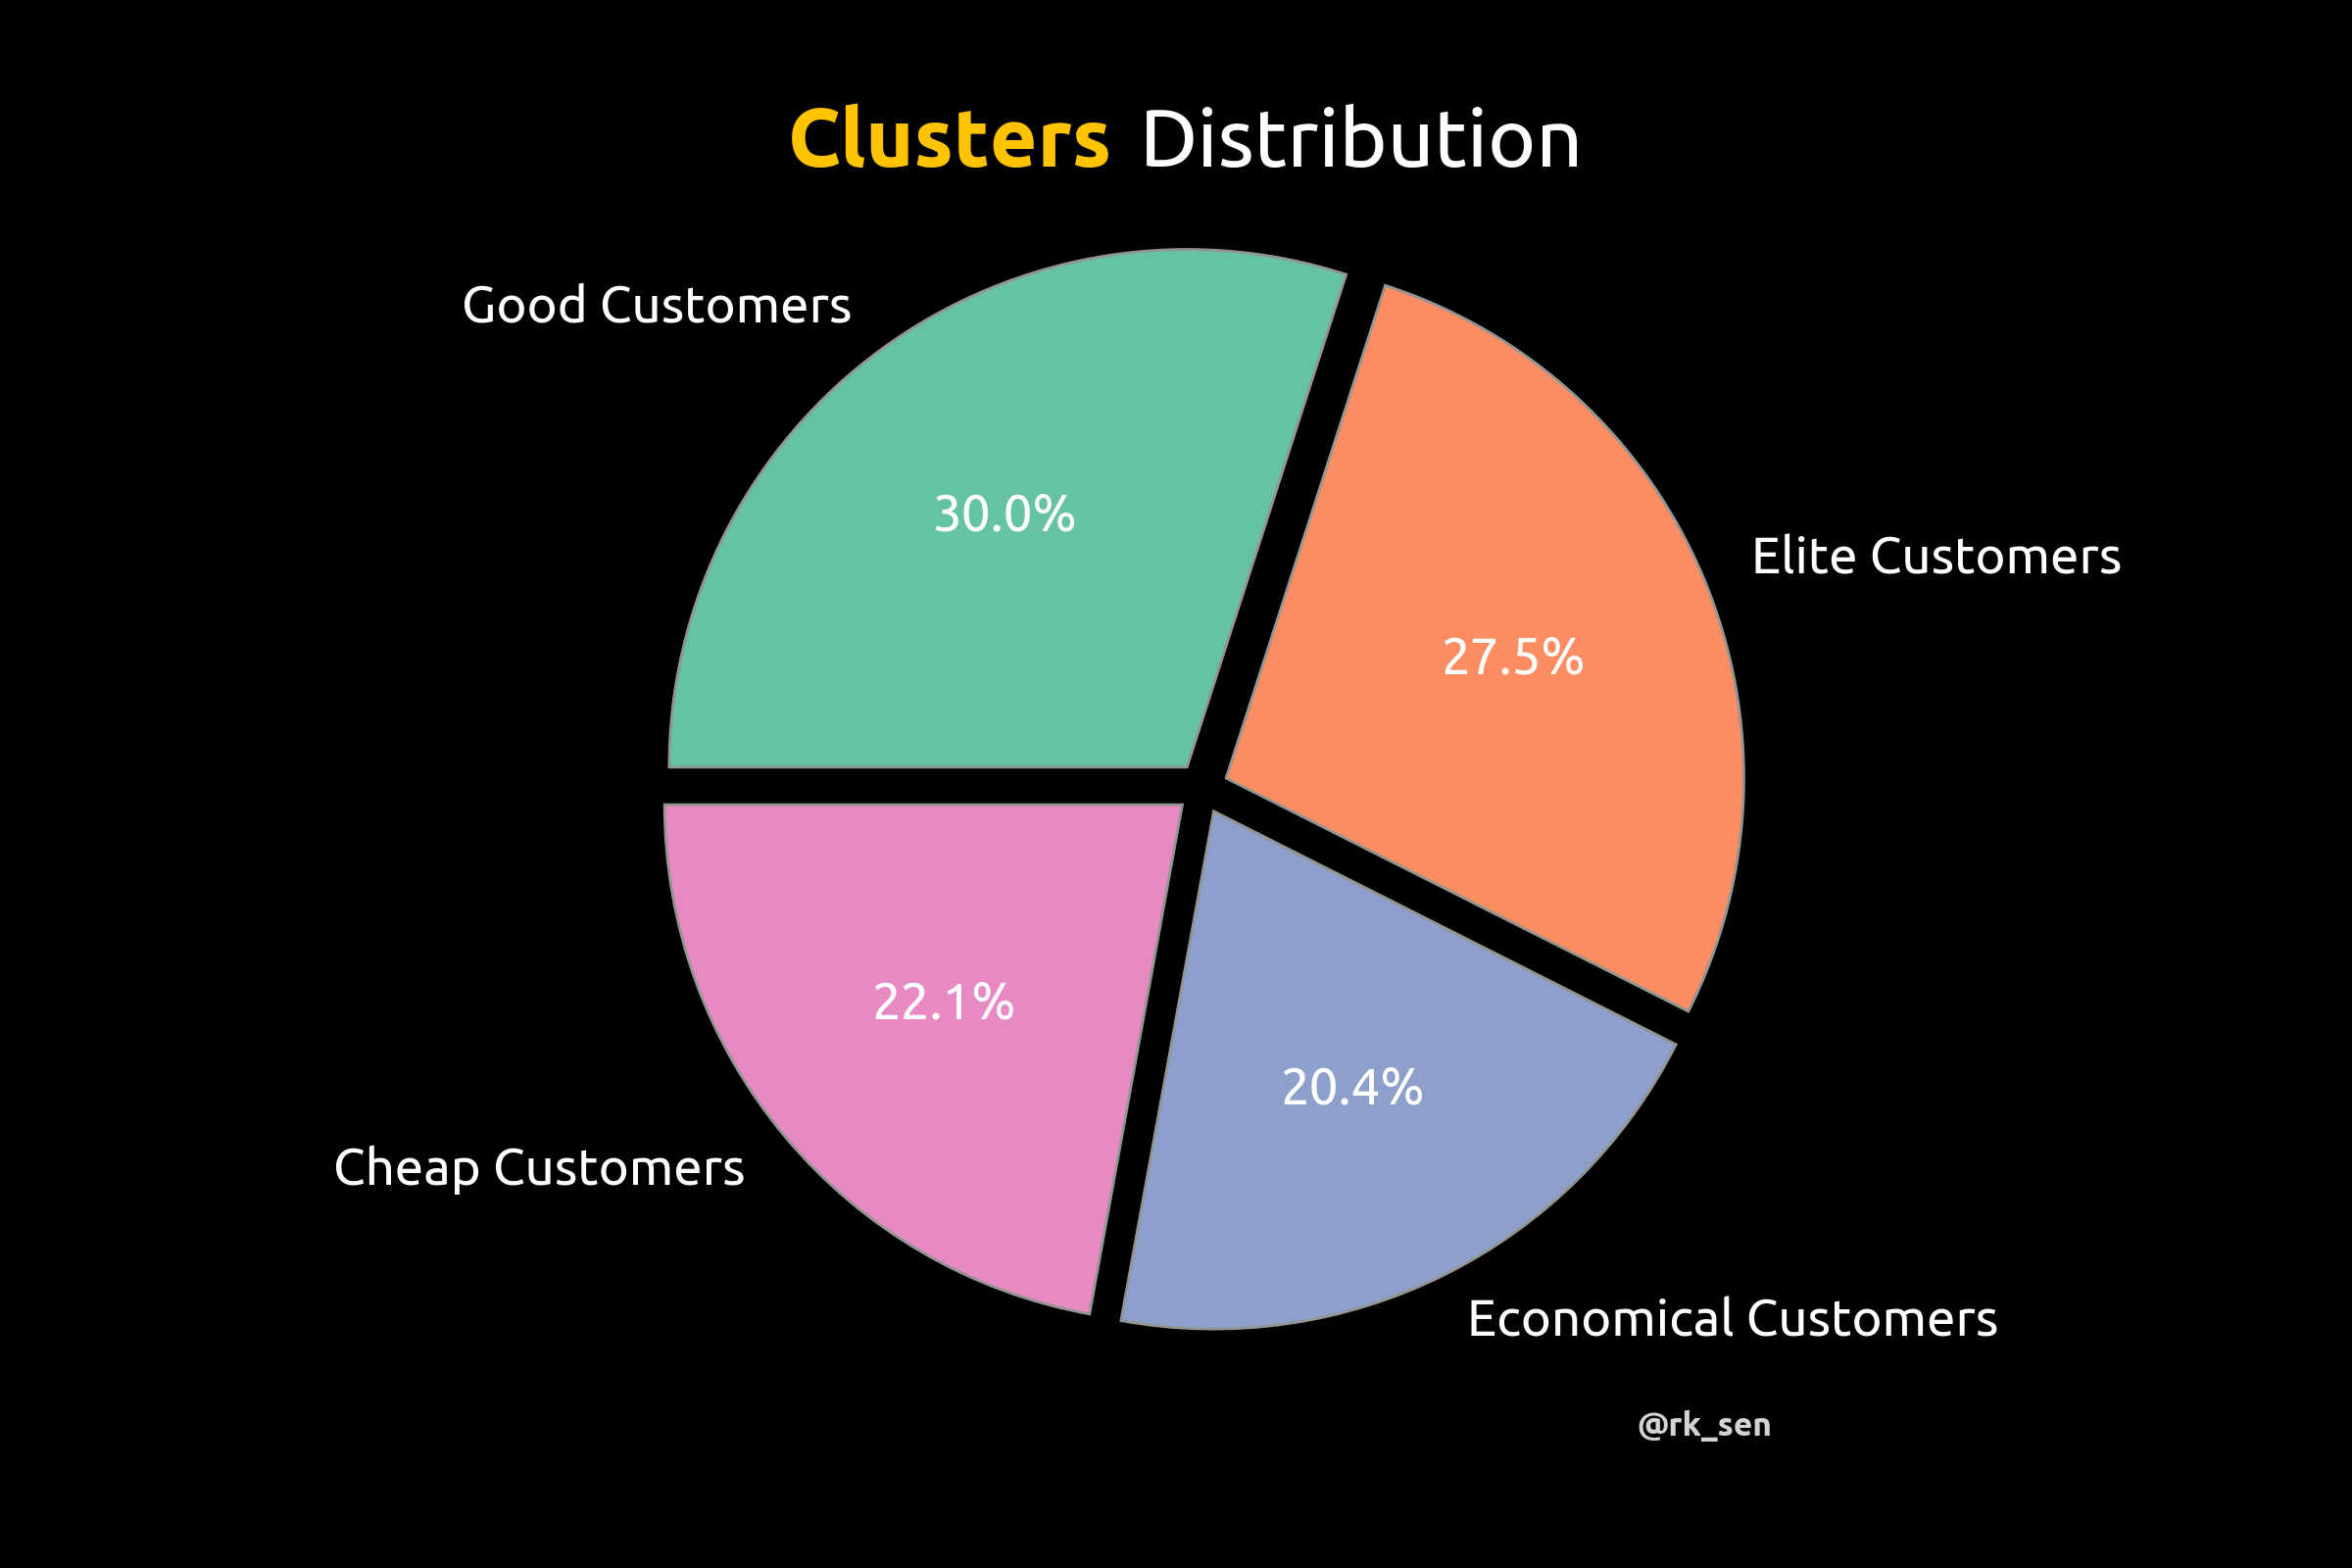

In [39]:
clusters_count = df_clusters['cluster'].value_counts()
clusters_count = clusters_count.to_frame().reset_index() 

clusters_count.columns = ['clusters','count']

clusters_count = clusters_count.sort_values('clusters',ascending=True)
labels = [
    "Good Customers",
    "Elite Customers",
    "Economical Customers",
    "Cheap Customers"
    ]

plt.figure(figsize=(12,8))
mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:4]

plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth': 1}
        )

plt.axis('equal')

# Title 
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-0.12, 1.2, "Distribution", size=30, color="white")


plt.text(1.1, -1.25, "@rk_sen", fontsize=12, ha="right", color='lightgray', fontweight="bold")

plt.show()

TypeError: ignored

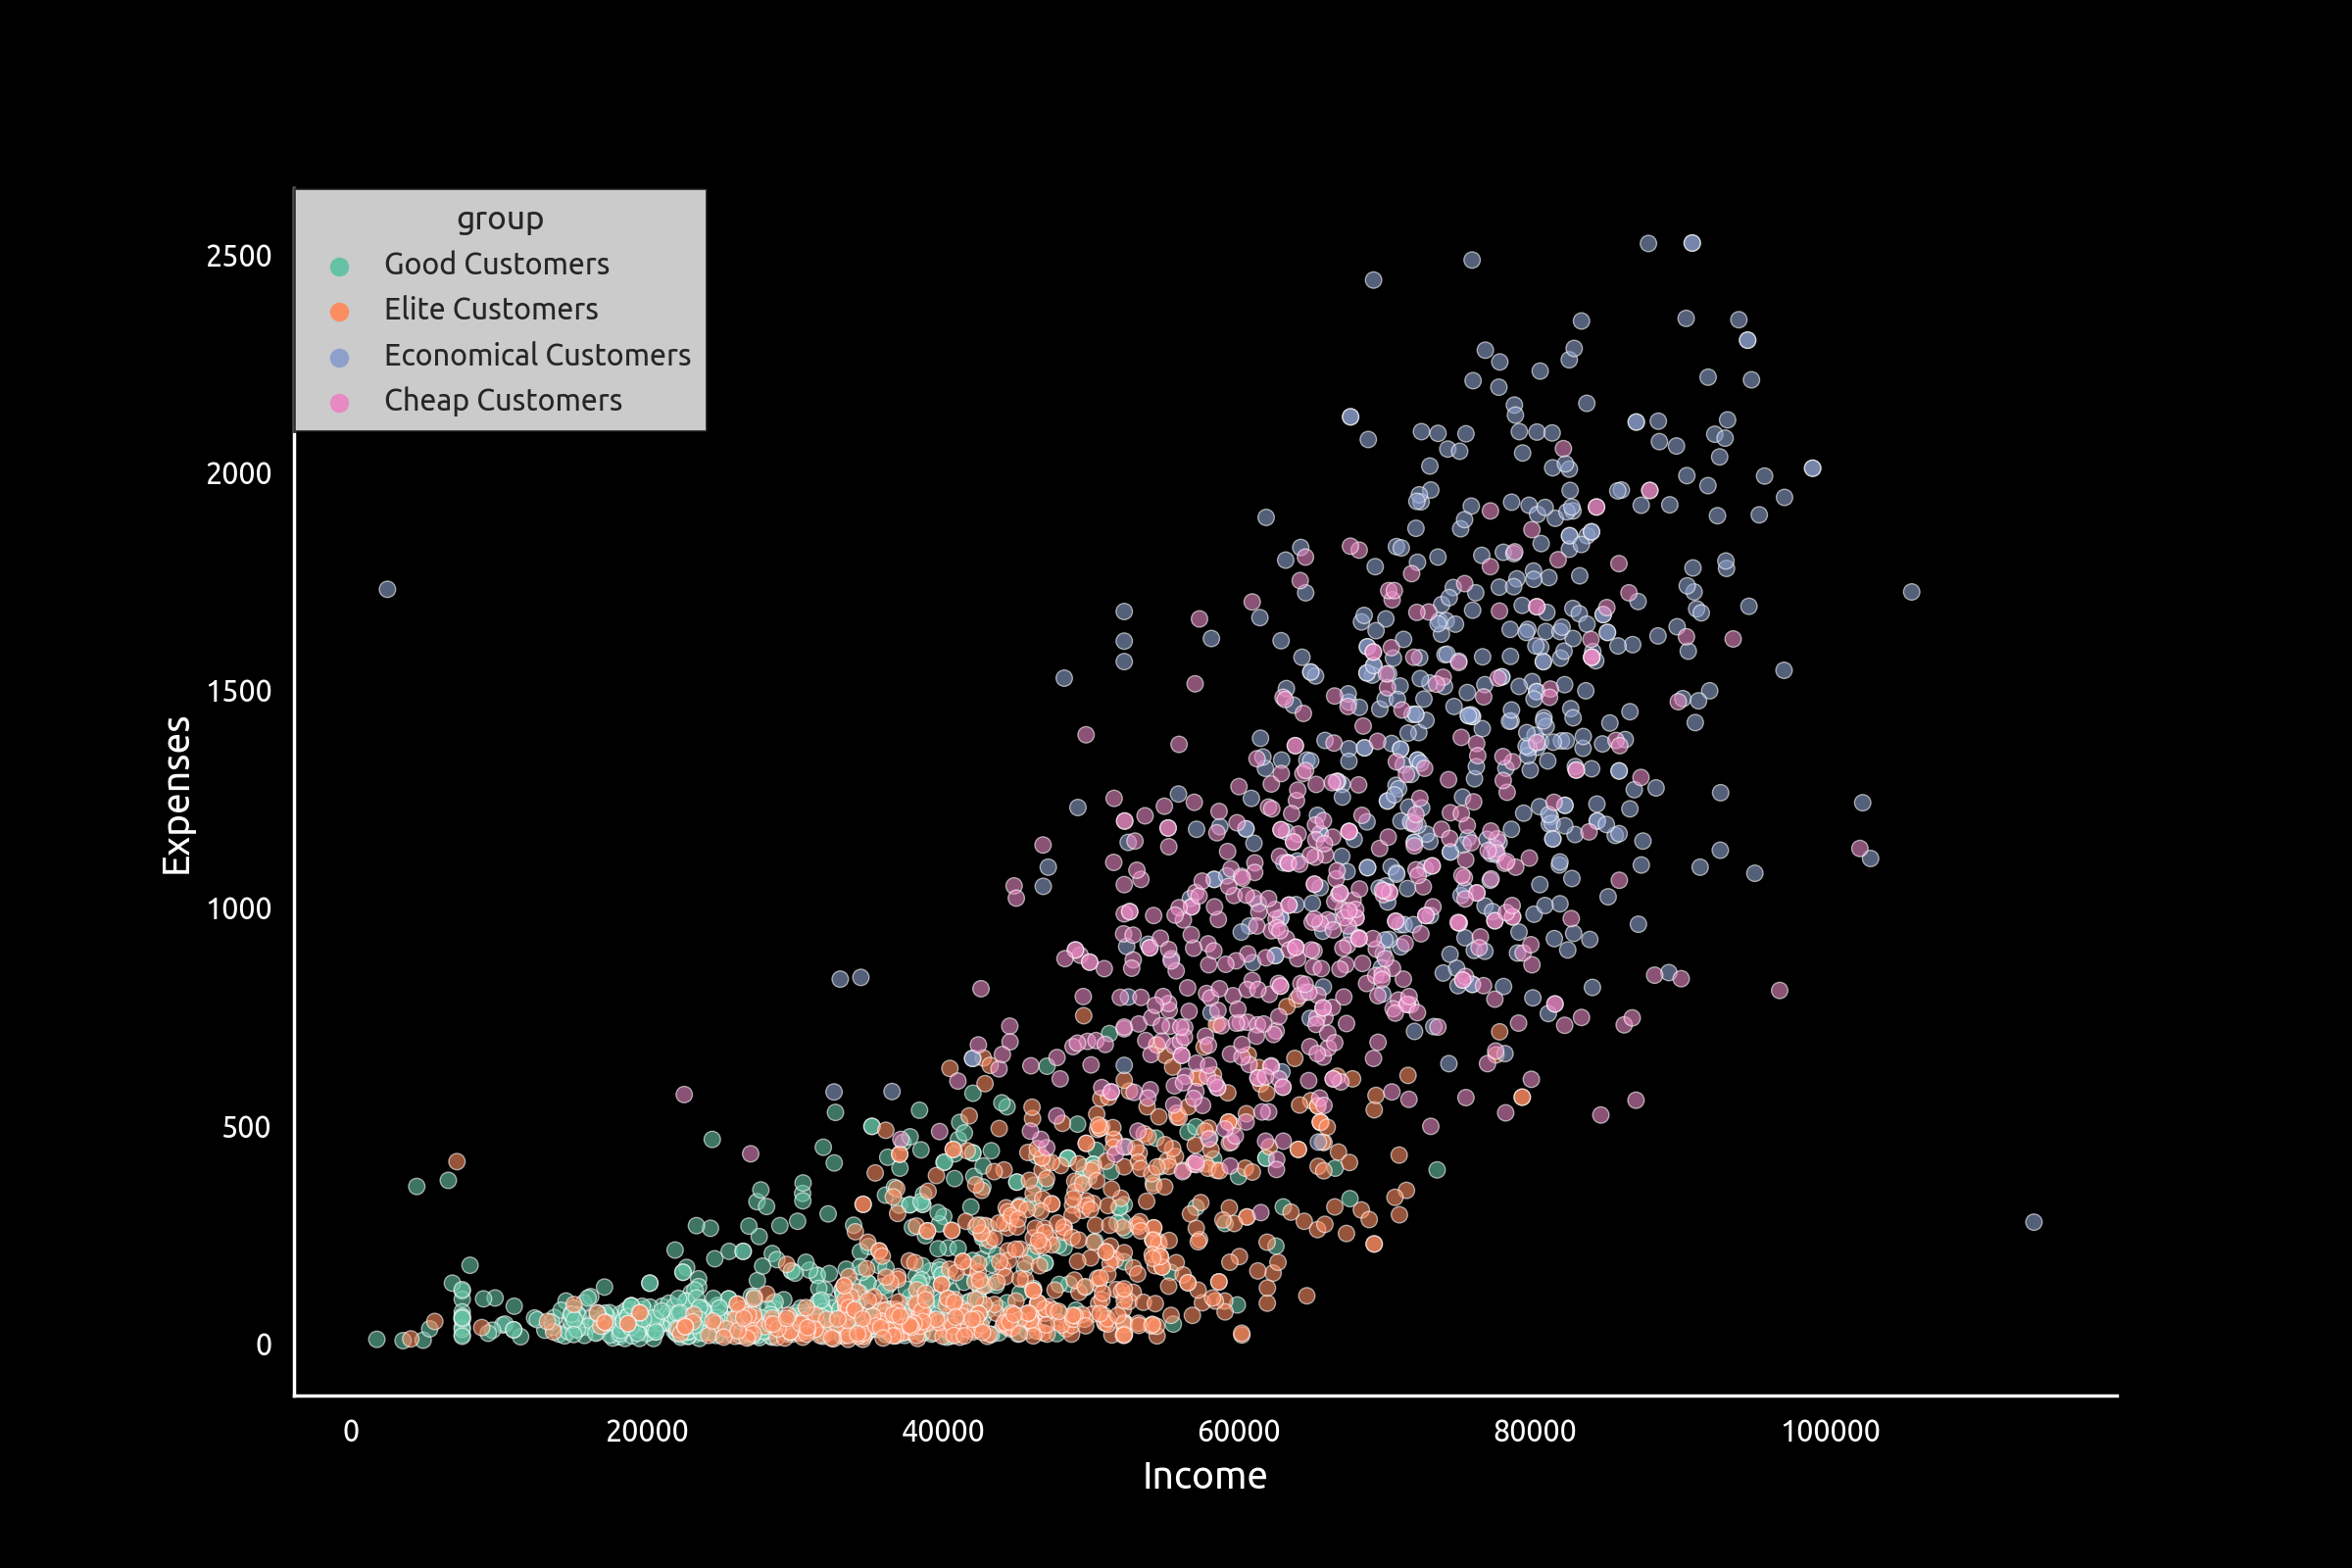

In [42]:
clusters_incomes = df_clusters[['Income', 'Expense', 'cluster']]           
clusters_incomes['group'] = clusters_incomes['cluster']                     # Create new variable
clusters_incomes['group'] = clusters_incomes['group'].astype(str)           # Change data type 

# Rename values
clusters_incomes['group'] = clusters_incomes['group'].str.replace('0', 'Good Customers')
clusters_incomes['group'] = clusters_incomes['group'].str.replace('1', 'Elite Customers')
clusters_incomes['group'] = clusters_incomes['group'].str.replace('2', 'Economical Customers')
clusters_incomes['group'] = clusters_incomes['group'].str.replace('3', 'Cheap Customers')

clusters_incomes = clusters_incomes.sort_values('group', ascending = False)    # Sorting data 

fig, ax = plt.subplots(figsize =(12, 8))

sns.scatterplot(data = clusters_incomes, x = 'Income', y = 'Expense', hue = 'group', palette = 'Set2', alpha=0.6)

plt.xlabel('Income', color = 'white', size = 14);
plt.ylabel('Expenses', color = 'white', size = 14);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tick_params(colors='white')

# Customize legend
plt.legend(labelcolor = 'white', frameon=False, bbox_to_anchor=(0.33, 0.8))    

# Title
plt.text(20000, 2750, "Clusters", size=22, color="#FFC300", fontweight="bold")
plt.text(38000, 2750, "by", size=22, color="white")
plt.text(45000,2750,"Income", size=22, color="#FFC300")
plt.text(61000, 2750, "&", size=22, color="white")
plt.text(67000,2750,"Expense", size=22, color="#FFC300")


plt.text(120000, -350, "@rk_sen", fontsize=12, ha="right", color='lightgray', fontweight="bold")

plt.show()

In [43]:
clusters_products = df_clusters[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'cluster']]    # Select variables

clusters_products1 = clusters_products.groupby(['cluster'])
clusters_products2 = clusters_products1.agg({'Wines':'sum', 'Fruits':'sum', 'Meat':'sum', 'Fish':'sum', 'Sweet':'sum', 'Gold':'sum'})

clusters_products3 = clusters_products2.stack().reset_index(name='Count').rename(columns={'level_1':'Products'})   # Oposite as pivoting

clusters_products3['group'] = clusters_products3['cluster']
clusters_products3['group'] = clusters_products3['group'].astype(str)

# Rename values
clusters_products3['group'] = clusters_products3['group'].str.replace('0', 'Good Customers')
clusters_products3['group'] = clusters_products3['group'].str.replace('1', 'Elite Customers')
clusters_products3['group'] = clusters_products3['group'].str.replace('2', 'Economical Customers')
clusters_products3['group'] = clusters_products3['group'].str.replace('3', 'Cheap Customers')

products = clusters_products3.copy()
products = products.assign(ratio=products.groupby('group').Count.transform(lambda x: x / x.sum()))

# Visualization
fig = px.bar(products, x='group', y='ratio', color='Products',
             labels={
                     "ratio": "Ratio",
                     "group": "Consumer's type"
                     },
             color_discrete_map={
                     'Gold': '#FFD700',
                     'Fish': '#87CEEB',
                     'Wines': '#b11226',
                     'Meat': '#f08080',
                     'Sweet': '#FF69B4',
                     'Fruits': 'lightgreen'},
                title="Products Distribution by Clusters")

fig.layout.yaxis.tickformat = ',.0%'

fig.update_traces(marker_line_color='white', marker_line_width=1, opacity=0.8)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout(
    {'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
    },
    font=dict(
        family="verdana",
        size=21,
        color="white"
    ),
    width=680,
    height=800,
    title_font_color="#FFC300",
    yaxis_title=None,
    xaxis_title=None
)

fig.show()

In [ ]:
## Wine and meat are the most popular products amongst all the groups. It would be beneficial to offer a greater variety of these products or special deals in these categories.
## People with no children tend to spend the most on their groceries. As a marketing recommendation, the business could implement campaigns targeting this segment.
## On the other hand, there is a certain group of consumers that don't spend much on their groceries. For this group, they could offer a section with very affordable and cheap products.
## Most of the consumers have enrolled for a company membership for a long period of time. To promote and protect loyal clients, the company can offer some free samples or coupons to active, long-time customers.
